## **ANALYSIS OF USERS MOTION PERCEPTION IN VR BASED ON DIFFERENT VISUAL AUDITORY/HAPTIC SIMULATION.**


***The list of setences that were given to the participants for sorting into  groups 1- 10 were :*** 
- Rate_your_sensation_of_self_motion
- Rate_your_sensation_of_movement
- Rate_how_fast_you_think_you_are_moving
- Rate_how_fast_you_are_moving
- Rate_your_speed
- Rate_how_fast_you_are_going
- Rate_how_fast_the_train_is_moving
- Rate_the_speed_of_the_train
- Rate_the_velocity_of_the_train
- Rate_how_intense_your_sensation_of_motion_is
- Rate_how_strong_is_your_sensation_of_self_motion
- Rate_the_intensity_of_your_perception_of_self_motion
- Rate_the_intensity_of_your_sensation_of_self_motion_in_the_virtual_environment
- Rate_your_perception_of_speed
- Rate_your_perceived_motion
- Rate_your_perception_of_self_motion
- Rate_your_perceived _movement

# **Data Pre-Processing**

Data Pre-Processing step is the data cleaning and data transformation phase which  involves renaming the columns as per convience for processing the data and handling missing values which is important in a data mining and finding correlations .





***The steps involved in processing the data is as follows***: 

---
- Joining of the two excel files , renumbering the rows of the first coulmns with an ID number - which represents the participant number.
- Removing unecessary coulmns and renaming as per convinience to process the data .
- Filling the missing values.

***Importing the necessary packages in python***

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 12})
import seaborn as sns
import collections
from collections import Counter
pd.set_option('display.max_columns', None) # show all column names display
pd.set_option('display.max_rows', None) # show all rows on display

***The data of the survey is fetched and  stored in "surveyData"***

In [17]:
dataset_path = 'results-survey173122.csv' 
surveyData = pd.read_csv(dataset_path,encoding = "ISO-8859-1")


***Checking all the columns/features of the survey dataset and its description.***



In [18]:
surveyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 33 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Response ID                                                                     48 non-null     int64  
 1   Age                                                                             48 non-null     object 
 2   Gender                                                                          48 non-null     object 
 3   Level_of_English                                                                48 non-null     object 
 4   Play_video_games                                                                47 non-null     object 
 5   Use_VR_apps_with_whd                                                            48 non-null     object 
 6   Rate_your_sensation_

- **Response ID** : Represents the individual participant number. 
- **Age** : Represents the age of the individual participants in terms of ranges
- **Gender** : Represents the gender of the individual participant.
- **Level of English** : Represents the Level of English , which is A1 - Beginner , A2 , B1 (42 - 71 Tofel score) ,B2 (72 - 94 TOFEL score) , C1 (95 -120 TOFEL score) , C2 - Proficient / Mother tounge.
- **Play video games** : Represents how often the participant plays video game.
- **Use VR app with wearable headmounted display** : Represents if the participant has used a wearable headmounted display for any VR applications.
- **The Features from the number 6 -22** : Represents the Questions asked to the participants for them to choose a particular group number ranging from 1 - 10.The feature names are the questions asked to the participant.
-**Features from the number 23 -32** : Represents the justification of the participants for classifying to a particular group , where the feature name represents the 
group number the participant have selected.


***Renaming some the column "Response ID"  to   "Response_ID"***



In [19]:
surveyData.rename(columns = {"Response ID": "Response_ID"}, inplace=True)
surveyData.head()

Response_ID                  Age  Gender                 Level_of_English  \
0            1  25 â 34 years old    Male  C2 - Proficient / Mother tongue   
1            2  35 â 44 years old    Male  C2 - Proficient / Mother tongue   
2            3  35 â 44 years old  Female  C2 - Proficient / Mother tongue   
3            4  25 â 34 years old    Male  C2 - Proficient / Mother tongue   
4            5  35 â 44 years old  Female  C2 - Proficient / Mother tongue   

           Play_video_games Use_VR_apps_with_whd  \
0  More than 3 times a week                Never   
1  More than 3 times a week                Never   
2  More than 3 times a week                Never   
3  Less than 3 times a week                Never   
4  More than 3 times a week                Never   

   Rate_your_sensation_of_self_motion  Rate_your_sensation_of_movement  \
0                                   4                                4   
1                                   3                                3   
2                                   2                                2   
3                                   5                                5   
4                                   2                                2   

   Rate_how_fast_you_think_you_are_moving  Rate_how_fast_you_are_moving  \
0                                       2                             3   
1                                       2                             1   
2                                       3                             1   
3                                       2                             2   
4                                       1                             1   

   Rate_your_speed  Rate_how_fast_you_are_going  \
0                3                            3   
1                1                            1   
2                1                            1   
3                2                            2   
4                1                            1   

   Rate_how_fast_the_train_is_moving  Rate_the_speed_of_the_train  \
0                                  1                            1   
1                                  1                            1   
2                                  1                            1   
3                                  2                            2   
4                                  1                            1   

   Rate_the_velocity_of_the_train  \
0                               1   
1                               1   
2                               1   
3                               2   
4                               1   

   Rate_how_intense_your_sensation_of_motion_is  \
0                                             4   
1                                             3   
2                                             2   
3                                             3   
4                                             3   

   Rate_how_strong_is_your_sensation_of_self_motion  \
0                                                 4   
1                                                 3   
2                                                 2   
3                                                 3   
4                                                 3   

   Rate_the_intensity_of_your_perception_of_self_motion  \
0                                                  2      
1                                                  2      
2                                                  3      
3                                                  3      
4                                                  3      

   Rate_the_intensity_of_your_sensation_of_self_motion_in_the_virtual_environment  \
0                                                  4                                
1                                                  3                                
2                                                  2                                
3                                  

As we can see in the data set there are some unwanted charaters present in the data , for instance , in the column Age , there are unwanted charcters such as 'â' which will cause issues during data processing . Hence cleaning of the data is essentail.

Cleaning the column **"Age"**

In [20]:
surveyData['Age'].value_counts()


25  34 years old      14
18  24 years old      13
45  54 years old       6
35  44 years old       5
35 â 44 years old     3
25 â 34 years old     3
55  64 years old       2
65  74 years old       1
75+ years old           1
Name: Age, dtype: int64

***Replacing invalid characters with a valid character***

In [21]:
surveyData.Age.replace({'25  34 years old': '25-34 years', '18  24 years old': '18-24 years', '45  54 years old': '45-54 years',
    '35  44 years old': '35-44 years', '35 â 44 years old': '35-44 years', '25 â 34 years old': '25-34 years', '55  64 years old': '55-64 years', '65  74 years old': '65-74 years'}, inplace=True)


***Checking if the characters have been replaced***

In [22]:
surveyData['Age'].value_counts()


25-34 years      17
18-24 years      13
35-44 years       8
45-54 years       6
55-64 years       2
65-74 years       1
75+ years old     1
Name: Age, dtype: int64

***Handling missing data***

Checking for the number of missing calues in each of the columns

In [23]:
surveyData.isna().sum()

Response_ID                                                                        0
Age                                                                                0
Gender                                                                             0
Level_of_English                                                                   0
Play_video_games                                                                   1
Use_VR_apps_with_whd                                                               0
Rate_your_sensation_of_self_motion                                                 0
Rate_your_sensation_of_movement                                                    0
Rate_how_fast_you_think_you_are_moving                                             0
Rate_how_fast_you_are_moving                                                       0
Rate_your_speed                                                                    0
Rate_how_fast_you_are_going                                      

The columns **'Play_video_games'**  and  the columns from **'Group_4  -    Group_10'**  has missing values.

---



***Eliminating columns that have larger number of missing values.***

In [24]:
columns_to_drop=['Group_10']
surveyData.drop(columns_to_drop, axis=1, inplace=True)

In [25]:
columns_to_drop=['Group_9']
surveyData.drop(columns_to_drop, axis=1, inplace=True)


In [26]:
columns_to_drop=['Group_8']
surveyData.drop(columns_to_drop, axis=1, inplace=True)

In [27]:
#listings.to_csv('Data.csv', index=False)

Since the dataset is based on categorical based values , missing values can be handled by making that particular missing value as one seperate category or by building a model to predict the category of the missing value. 






For the feature **"how often do you play video games"** it is found that there are three categories identified based on the participant's input, as shown below:


In [28]:
surveyData['Play_video_games'].value_counts()


Never                       19
More than 3 times a week    16
Less than 3 times a week    12
Name: Play_video_games, dtype: int64

In [29]:
surveyData.Play_video_games.fillna('Never', inplace=True)

Since this feature has only one missing value, it can be replaced with the most categorized value , i.e. **Never** which is inputted most by the participants compared to the other options.

***Checking other features for missing values***

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  


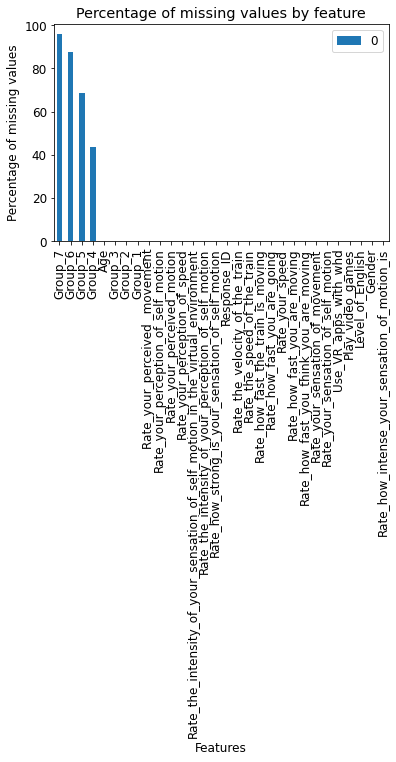

In [30]:
pd.DataFrame(surveyData.isnull().sum()/len(surveyData)*100).nlargest(600,columns=0).plot(kind="bar") 
plt.rcParams["figure.figsize"] = [15, 11] #10,6
plt.title("Percentage of missing values by feature")
plt.xlabel("Features")
plt.ylabel("Percentage of missing values")
plt.tight_layout()



Features that have more than **80%** missing values are deleted , which are **Group 7 and Group 6** , which arent usefull in processing the data.

In [31]:
columns_to_drop=['Group_7']
surveyData.drop(columns_to_drop, axis=1, inplace=True)

In [32]:
columns_to_drop=['Group_6']
surveyData.drop(columns_to_drop, axis=1, inplace=True)

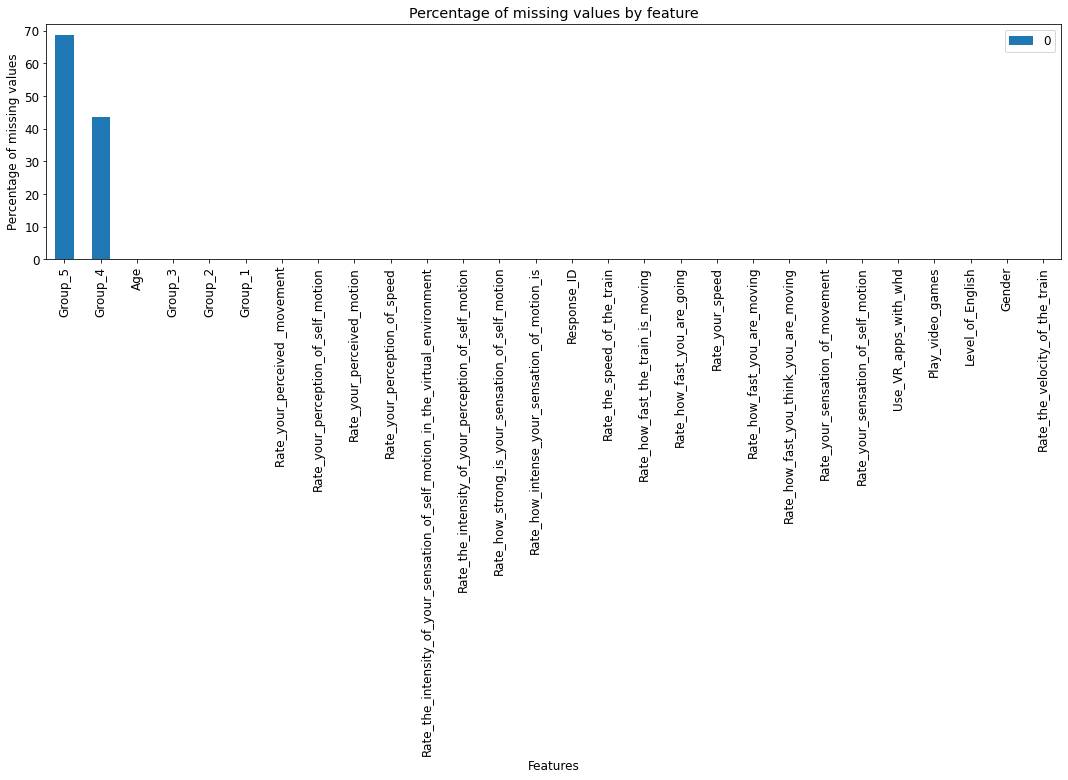

In [33]:
#pd.DataFrame(surveyData.isnull().sum()/len(surveyData)*100).nlargest(5,columns =0).plot(kind="pie",subplots=True) 
#plt.title("Percentage of missing values by feature")
#plt.tight_layout()
pd.DataFrame(surveyData.isnull().sum()/len(surveyData)*100).nlargest(600,columns=0).plot(kind="bar") 
plt.rcParams["figure.figsize"] = [15, 11] #10,6
plt.title("Percentage of missing values by feature")
plt.xlabel("Features")
plt.ylabel("Percentage of missing values")
plt.tight_layout()

We can conclude that the main groups with the participants justification is **Group 1 , Group 2 and Group 3**, that does not have any missing values. 


---



***Removing the null values from Group 4 and Group 5 , the remaining values are used for further processing.***

In [34]:
surveyData.Group_4.dropna(inplace= True)

In [35]:
surveyData.Group_4

0     This group has to do with how your motion make...
3     A mix between group 1 and 2 but doesn't fit in...
6     more about the feeling of motion intensity ins...
7     These sentences are all about my perception of...
8     I grouped these sentences together based on in...
10                       All about the trains movement.
12      it is about how strong your feeling of speed is
16                                    Personal movement
17    describes the extent to which one believes the...
18                    Decision making about train speed
19       asking you be to be subjective about the speed
21                About the intensity of the perception
22                             perpception of intensity
25    Here I am being asked about how intense the fe...
26    Sentences that relate to how a person senses t...
27                                          Self motion
28    Measuring the sensation of the movement rather...
29    Here I am rating the movement I thought to

In [36]:
surveyData.Group_5.dropna(inplace= True)

In [37]:
surveyData.Group_5

0     This group has to do with your understanding o...
3     This is about what movement you're actually fe...
12                           it is about your sensation
16                                                Speed
17                    describes the feeling of movement
18         Decision making about my perception of speed
21    Similar to Group 3 - rating what?  Your percep...
22     perception of own movement, not limited to speed
26    General sentences relating to how a person sen...
27                                                    -
31    quality of the sensation of movement in more g...
32                                   Similar ro group 3
34    Same as 3 but more general to sensing movement...
41     perceived own motion (acknowledges subjectivity)
42    you ask about self-motion here, which is a spe...
Name: Group_5, dtype: object



---


Since the columns of the user Justification i.e. , Group_1 - Group_5 is in the format of an **unstructured data**, Natural Language Processing is used for further processing.


---



***NLP***


---



***Tokenization , Stemming and Removal of Stop words***

In [38]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')

#load tokenizer, stemmer and stop words
tokenizer = RegexpTokenizer(r'\w+')
stemmer = PorterStemmer() 
stop_words = set(stopwords.words('english'))
surveyData.Group_4.dropna(inplace= True)
surveyData.Group_5.dropna(inplace= True)
group1 = surveyData.Group_1
group2 = surveyData.Group_2
group3 = surveyData.Group_3
group4 = surveyData.Group_4
group5 = surveyData.Group_5

#convert values to list of lists (each row becomes a separate list)

TG1 = group1.values.tolist() 
TG2 = group2.values.tolist() 
TG3 = group3.values.tolist() 
TG4 = group4.values.tolist() 
TG5 = group5.values.tolist() 


test =tokens = [tokenizer.tokenize(str(i)) for i in group1]

 #tokenize words in lists
tokens = [tokenizer.tokenize(str(i)) for i in TG1]
tokens1 = [tokenizer.tokenize(str(i)) for i in TG2] 
tokens2 = [tokenizer.tokenize(str(i)) for i in TG3]
tokens3 = [tokenizer.tokenize(str(i)) for i in TG4]
tokens4 = [tokenizer.tokenize(str(i)) for i in TG5] 

Tokens_of_all_groups = tokens+tokens1+tokens2+tokens3+tokens4#+tokens5+tokens6


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


The tokens for all the groups is shown below stored in **Tokens_of_all_groups** , individual participants Justification group tokens for Group 1 - 5 is stored in **tokens, tokens1, tokens2, tokens3, tokens4** respectively.

In [39]:
surveyData['Level_of_English'].value_counts()


C2 - Proficient / Mother tongue    37
C1 (95-120)                         7
B2 (72-94)                          4
Name: Level_of_English, dtype: int64

In [40]:
surveyData['Use_VR_apps_with_whd'].value_counts()

Never           39
Once a month     6
Once a week      3
Name: Use_VR_apps_with_whd, dtype: int64

#**Exploratory Data Analysis**

Below is the percentage values of the participants who have classified the statements into the respective groups 1-10. Green indicates a larger percentage value and red indicates a small percentage value.

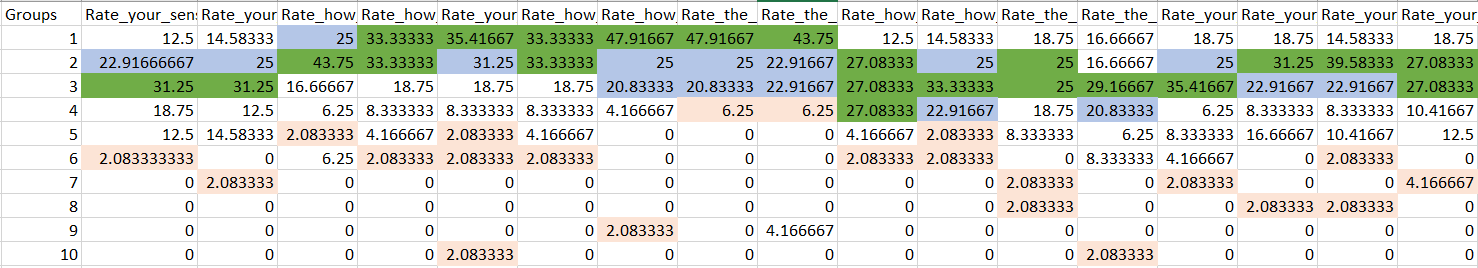

It is identified that the main groups used for classification by the participants are from **group  1 - 3**

It is identified that majority of the participants have classified the statements into the respective groups as follows :

**GROUP 1** :
- Rate_how_fast_you_are_moving
- Rate_your_speed
- Rate_how_fast_you_are_going
- Rate_how_fast_the_train_is_moving
- Rate_the_speed_of_the_train
- Rate_the_velocity_of_the_train
- Rate_how_fast_you_think_you_are_moving

**GROUP 2**:
- Rate_how_fast_you_think_you_are_moving
- Rate_how_fast_you_are_moving
- Rate_how_fast_you_are_going
- Rate_how_intense_your_sensation_of_motion_is
- Rate_the_intensity_of_your_perception_of_self_motion
- Rate_your_perceived_motion
- Rate_your_perception_of_self_motion
- Rate_your_perceived _movement
- Rate_your_sensation_of_self_motion
- Rate_your_sensation_of_movement
- Rate_your_speed
- Rate_how_fast_the_train_is_moving
- Rate_the_speed_of_the_train
- Rate_the_velocity_of_the_train
- Rate_how_strong_is_your_sensation_of_self_motion
- Rate_your_perception_of_speed

**GROUP 3**:
- Rate_your_sensation_of_self_motion
- Rate_your_sensation_of_movement
- Rate_how_intense_your_sensation_of_motion_is
- Rate_how_strong_is_your_sensation_of_self_motion
- Rate_the_intensity_of_your_perception_of_self_motion
- Rate_the_intensity_of_your_sensation_of_self_motion_in_the_virtual_environment
- Rate_your_perception_of_speed
- Rate_your_perceived _movement
- Rate_your_perception_of_self_motion
- Rate_how_fast_the_train_is_moving
- Rate_the_speed_of_the_train
- Rate_the_velocity_of_the_train
- Rate_your_perceived_motion

**GROUP 4**:
- Rate_how_intense_your_sensation_of_motion_is
- Rate_how_strong_is_your_sensation_of_self_motion
- Rate_the_intensity_of_your_sensation_of_self_motion_in_the_virtual_environment



---


The categories identified were as follows :


---



**Category A** (Common to Group 1&2) :
- Rate How fast you are moving 
- Rate How fast you are going
- Rate How fast you think you are moving

**Category B** (Common to Group 2&3):
- Rate how intense your sensation of motion is
- Rate the intensity of your perception of self motion
- Rate your percieved movement 

**Category C** (Common to group 2,3&4):
- Rate how intense your sensation of motion is

**Category D**( Common to Group 2&3) :
- Rate your sensation of self motion 
- Rate your sensation of movement 
- Rate your perception of speed

**Category E** ( Common to group 1,2 &3) :
- Rate how fast the train is moving
- Rate the speed of the train 
- Rate the velocity of the train



---


- In **91.66%** of the participants, **"Rate how fast you are moving"**,**"Rate how fast you are going"** and "**Rate how fast you think you are moving**"were grouped together. 
- In **79.16%** of the participants **"Rate how intense your sensation of motion is"** , **"Rate the intensity of your perception of self motion"** and **"Rate your percieved movement"** were grouped together. 
- In **54.16 %**of the participants "**Rate how intense your sensation of motion is**" were commonly used. 
- In **72.916 %** of the participants "**Rate your sensation of self motion**" , "**Rate your sensation of movement**" and "**Rate your perception of speed**" were grouped together.
- In **72.91 %** of the participants , "**Rate how fast the train is moving**", "**Rate the speed of the train**" and "**Rate the velocity of the train**" is commonly used.
- In **56.24 %** of the participants , "**Rate the intensity of your sensation of self motion in the virtual environment**" were commonly used.
- In **81.24 %** of the participants , "**Rate how strong is your sensation of self motion**" was used commonly.


---



Checking for similarity in justification for classification by individual participants using cosine similaity measure

In [ ]:
ColumnOfGroup1 = surveyData.Group_1
ColumnOfGroup2 = surveyData.Group_2
ColumnOfGroup3 = surveyData.Group_3
ColumnOfGroup4 = surveyData.Group_4
ColumnOfGroup5 = surveyData.Group_5

# Scikit Learn
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Checking for pairwise similarity
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix1 = count_vectorizer.fit_transform(ColumnOfGroup1)
sparse_matrix2 = count_vectorizer.fit_transform(ColumnOfGroup2)
sparse_matrix3 = count_vectorizer.fit_transform(ColumnOfGroup3)
sparse_matrix4 = count_vectorizer.fit_transform(ColumnOfGroup4)
sparse_matrix5 = count_vectorizer.fit_transform(ColumnOfGroup5)

matrix1 = cosine_similarity(sparse_matrix1[0:1], sparse_matrix1)
matrix2 = cosine_similarity(sparse_matrix2[0:1], sparse_matrix2)
matrix3 = cosine_similarity(sparse_matrix3[0:1], sparse_matrix3)
matrix4 = cosine_similarity(sparse_matrix4[0:1], sparse_matrix4)
matrix5 = cosine_similarity(sparse_matrix5[0:1], sparse_matrix5)

In [ ]:
matrix1

array([[1.        , 0.31448545, 0.09805807, 0.1754116 , 0.38096966,
        0.0836242 , 0.2941742 , 0.09805807, 0.48891771, 0.70891756,
        0.13867505, 0.52414242, 0.        , 0.        , 0.30769231,
        0.        , 0.13867505, 0.10482848, 0.0877058 , 0.43852901,
        0.16012815, 0.87705802, 0.20965697, 0.45291081, 0.34698896,
        0.12403473, 0.50128041, 0.73379939, 0.12403473, 0.24019223,
        0.43852901, 0.66899361, 0.36980013, 0.36980013, 0.41931393,
        0.22237479, 0.        , 0.        , 0.41344912, 0.19611614,
        0.04331481, 0.33968311, 0.24019223, 0.35805744, 0.68640647,
        0.3721042 , 0.36313652, 0.50174521]])

In [ ]:
matrix2

array([[1.        , 0.10482848, 0.09245003, 0.14322297, 0.19611614,
        0.0877058 , 0.12403473, 0.23076923, 0.15724273, 0.44474959,
        0.13867505, 0.        , 0.31448545, 0.        , 0.52297636,
        0.        , 0.07412493, 0.10482848, 0.09245003, 0.        ,
        0.        , 0.18490007, 0.12403473, 0.09805807, 0.0836242 ,
        0.13453456, 0.1672484 , 0.13867505, 0.0836242 , 0.        ,
        0.07692308, 0.        , 0.1672484 , 0.3363364 , 0.5728919 ,
        0.0836242 , 0.        , 0.        , 0.1902606 , 0.        ,
        0.06933752, 0.        , 0.1672484 , 0.15724273, 0.20965697,
        0.04902903, 0.10482848, 0.        ]])

In [ ]:
matrix3

array([[1.        , 0.16666667, 0.0949158 , 0.30618622, 0.21004201,
        0.10206207, 0.09128709, 0.08333333, 0.070014  , 0.21004201,
        0.        , 0.08885233, 0.11785113, 0.        , 0.12909944,
        0.20412415, 0.        , 0.12909944, 0.12909944, 0.19245009,
        0.        , 0.        , 0.25819889, 0.25819889, 0.0745356 ,
        0.15811388, 0.11785113, 0.25819889, 0.18257419, 0.08006408,
        0.15309311, 0.        , 0.26111648, 0.08703883, 0.12909944,
        0.        , 0.        , 0.26111648, 0.30123204, 0.        ,
        0.14784425, 0.10910895, 0.        , 0.09128709, 0.        ,
        0.12309149, 0.        , 0.        ]])

In [ ]:
matrix4

array([[1.        , 0.09622504, 0.08333333, 0.08006408, 0.05892557,
        0.        , 0.16666667, 0.        , 0.16012815, 0.        ,
        0.17407766, 0.        , 0.        , 0.08333333, 0.27386128,
        0.20412415, 0.        , 0.09622504, 0.09901475, 0.21821789,
        0.1132277 , 0.11785113, 0.41182635, 0.10910895, 0.28867513,
        0.09128709, 0.        ]])

In [ ]:
matrix5

array([[1.        , 0.2236068 , 0.2       , 0.        , 0.2       ,
        0.16903085, 0.42426407, 0.23717082, 0.15811388, 0.        ,
        0.27975144, 0.12909944, 0.21213203, 0.1       , 0.3       ]])

**GROUP** **1** .


---



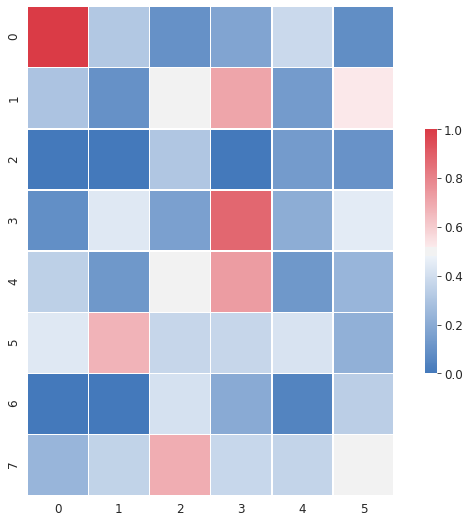

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# A list with your data slightly edited

group_1 = [1.0,0.31448545,0.09805807,0.1754116,0.38096966,0.0836242,
0.2941742,0.09805807,0.48891771,0.70891756,0.13867505,0.52414242,
0.0,0.0,0.30769231,0.0,0.13867505,0.10482848,
0.0877058,0.43852901,0.16012815,0.87705802,0.20965697,0.45291081,
0.34698896,0.12403473,0.50128041,0.73379939,0.12403473,0.24019223,
0.43852901,0.66899361,0.36980013,0.36980013,0.41931393,0.22237479,
0.0,0.0,0.41344912,0.19611614,0.04331481,0.33968311,
0.24019223,0.35805744,0.68640647,0.3721042 ,0.36313652,0.50174521]

# Split list
n = 6
data = [group_1[i:i + n] for i in range(0, len(group_1), n)]

df = pd.DataFrame(data)

def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(df, dropDuplicates = False)




---


***Identifying the most common phrases / keywords used by the participants.***


---



***Defining a function to convert any sentences to individual words***

In [ ]:
def convert(lst): 
    return ' '.join(lst).split() 
      

***Converting the sentences of Group 1 to words and storing in the variable words_of_group1***

In [ ]:
words_of_group1 = convert(TG1) 


***Total count of the words are obtained.***

In [ ]:
count_of_words = Counter(words_of_group1)
print(count_of_words)

Counter({'the': 45, 'of': 32, 'to': 20, 'speed': 19, 'is': 9, 'about': 9, 'and': 8, 'how': 8, 'you': 8, 'are': 8, 'sentences': 8, 'a': 7, 'I': 7, 'train"': 7, 'fast': 6, 'movement"': 5, 'perception': 5, '"These': 5, 'that': 5, 'train': 5, 'movement': 4, 'all': 4, 'my': 4, 'actual': 4, '"The': 4, 'refer': 4, 'am': 4, '"This': 3, 'group': 3, 'with': 3, '"All': 3, 'based': 3, 'on': 3, 'rate': 3, 'in': 3, 'rating': 3, 'as': 3, 'motion"': 3, 'or': 3, 'which': 3, 'from': 3, 'me': 3, 'do': 2, 'your': 2, 'would': 2, 'physical': 2, 'self': 2, '(3': 2, 'considered': 2, 'personal': 2, 'quantity': 2, 'sensation': 2, 'objective': 2, 'intensity': 2, 'related': 2, 'subjective': 2, '"Here': 2, 'going,': 2, 'train,': 2, 'rather': 2, 'than': 2, 'sensation,': 2, 'ask': 2, 'only"': 2, 'imaginary': 2, 'has': 1, 'train."': 1, '"contains': 1, 'items': 1, 'relating': 1, 'involve': 1, 'velocity,': 1, 'most': 1, 'simple': 1, 'questions"': 1, 'perceive': 1, 'instructions': 1, 'assumption': 1, 'felt': 1, 'realist

***Plotting the bar graph for the 30 most commonly used words by the participants***

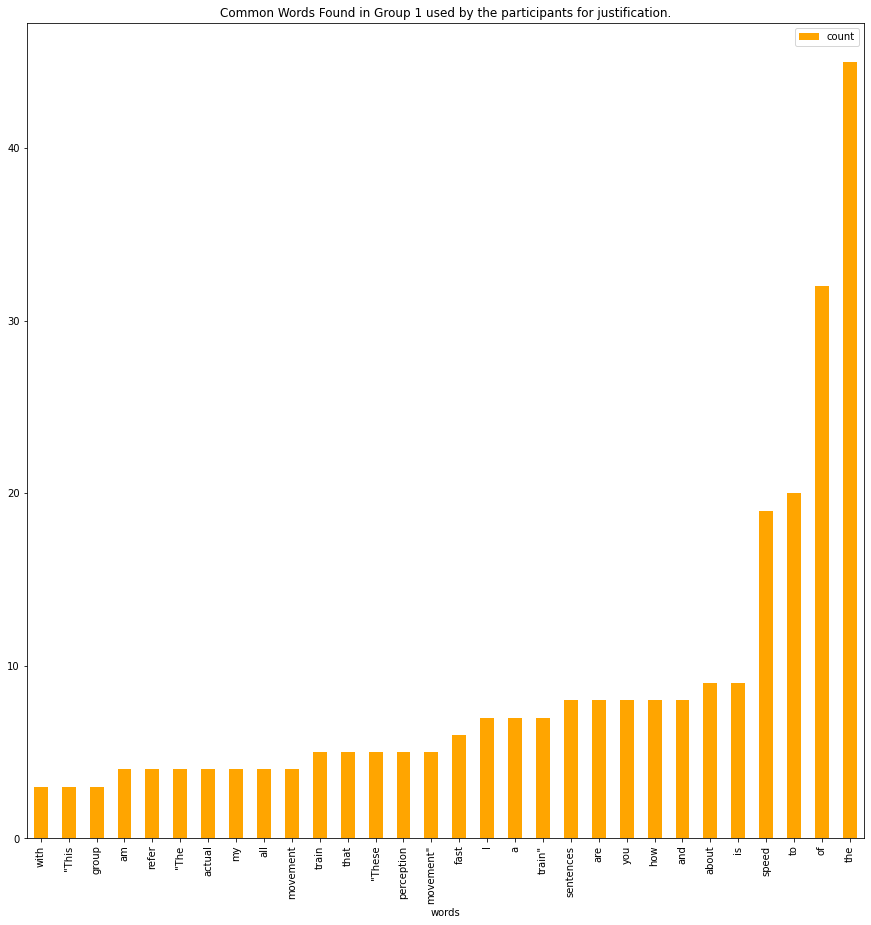

In [ ]:
# Takes the Top 30 commonly used words
count_of_words.most_common(30)


words = pd.DataFrame(count_of_words.most_common(30),
                             columns=['words', 'count'])

words.head()

fig, ax = plt.subplots(figsize=(15,15 )) #8,8

# Plot horizontal bar graph
words.sort_values(by='count').plot.bar(x='words',
                      y='count',
                      ax=ax,
                      color="orange")

ax.set_title("Common Words Found in Group 1 used by the participants for justification.")

plt.show()

From the top 30 words , the key words extracted are **Speed** , **Sentences** , **Train** , **fast** , **movement** , **Perception**.

The total word count are :
- **Speed** :19 
- **Sentences** : 8 
- **Train** : 7
- **Fast** : 6 
- **Movement** : 5 
- **Perception** : 5



---




***Grouping all the sentences with these words and checking for the existence of a combination of words.***


---



In [ ]:
CoverageACol = np.array(surveyData.Group_1.values)
count =0  
count1 =0
count2 =0
count3 =0
sent_count =0
count5 = 0
list1=CoverageACol

list2=["train"] #
list3 =["speed"]
list4 =["movement"]
list5 = ["perception"]
combined =["train","speed"]
combination1 = ["movement","perception"]
sen = ["sentences"]
fa1=["fast"]
movm1 = ["movement"]
percp = ["perception"]
train = []
speed =[]
both =[]
both1 =[]
train_speed =[]
sentences = []
fast = []
movement= []
perception = []
for word in list2:
  for phrase in list1:
    if word.lower() in phrase.lower():
      train.append(phrase)
      count = count +1

for word in list3:
  for phrase in list1:
    if word.lower() in phrase.lower():
      speed.append(phrase)
      count1 = count1 +1

for word in combined:
  for phrase in list1:
    if word.lower() in phrase.lower():
      if word.lower() in list2 and list3: 
        both.append(phrase)
        count3 = count3 +1

for word in sen:
  for phrase in list1:
    if word.lower() in phrase.lower():
      sentences.append(phrase)
      sent_count = sent_count +1

for word in fa1:
  for phrase in list1:
    if word.lower() in phrase.lower():
      fast.append(phrase)
      fast_count = sent_count +1

for word in movm1:
  for phrase in list1:
    if word.lower() in phrase.lower():
      movement.append(phrase)
      movm_count = sent_count +1

for word in percp:
  for phrase in list1:
    if word.lower() in phrase.lower():
      perception.append(phrase)
      percep_count = sent_count +1

for word in combination1:
  for phrase in list1:
    if word.lower() in phrase.lower():
      if word.lower() in list4 and list5: 
        both1.append(phrase)
        count5 = count5 +1

unique_result = set(train)
print(train)
print(speed)
print("The sentences for both are :",both)
print("The sentences with sentences ",sentences)
#print(unique_result)
print("Train Count :",count)
print("Speed Count",count1)
print("both parases Count",count3)
print("sentences count",sent_count)
print("fast count",fast_count)
print("movement count",movm_count)
print("perception count",percep_count)
print("both perception and moveme count",count5)

['"This group has to do with the speed of the train."', '"The first group refers to all the sentences relative to the actual speed of the train"', '"To do with the speed of the train"', '"It is related to the train" ', '"Contains sentences that refer to how a person perceives the movement of the train"', '"The speed of the train"', '"Related to my feelings of the train, rather than myself"', '"quality of the speed of the train"', '"Asking what speed the train is going"', '"Train only"', '"perceived speed of train  (acknowledges subjectivity)"', '"These sentences are about how fast the observer thinks the train is moving."', '"Quantifies the speed of the train"', '"Imaginary movement of the imaginary me and imaginary train which are the same"', '"rating the train, describing the train only"']
['"This group has to do with the speed of the train."', '"contains items relating to speed of movement"', '"All involve speed and velocity, most simple questions"', '"These instructions are based o



---

***Extracting Sentences for all the keywords of a particular group***

---



In [ ]:
speed

['"This group has to do with the speed of the train."',
 '"contains items relating to speed of movement"',
 '"All involve speed and velocity, most simple questions"',
 '"These instructions are based on the assumption that you felt a realistic sense of motion and they are asking you to rate the speed of that movement the same way you would in a real world scenario."',
 '"These sentences are all about my own speed"',
 '"I grouped them based on actual speed of the self (3 sentences) and the vehicle (3 sentences). I considered actual speed as the main category here, then considered two sub categories as the actual speed of the self and the vehicle."',
 '"The first group refers to all the sentences relative to the actual speed of the train"',
 '"All about personal speed."',
 '"These sentences would refer to concrete facts. The speed and velocity are measurable."',
 '"To do with the speed of the train"',
 '"quasi-objective measure of speed i am travelling"',
 '"The speed of the train"',
 '"M

In [ ]:
sentences

['"These sentences are all about my own speed"',
 '"I grouped them based on actual speed of the self (3 sentences) and the vehicle (3 sentences). I considered actual speed as the main category here, then considered two sub categories as the actual speed of the self and the vehicle."',
 '"The first group refers to all the sentences relative to the actual speed of the train"',
 '"These sentences would refer to concrete facts. The speed and velocity are measurable."',
 '"Contains sentences that refer to how a person perceives the movement of the train"',
 '"All sentences refer to the perception of self-motion"',
 '"These sentences describe a command to subjectively evaluate how fast you are going. All sentences ask you how fast you are going, from your subjective perspective."',
 '"These sentences are about how fast the observer thinks the train is moving."']

In [ ]:
train

['"This group has to do with the speed of the train."',
 '"The first group refers to all the sentences relative to the actual speed of the train"',
 '"To do with the speed of the train"',
 '"It is related to the train" ',
 '"Contains sentences that refer to how a person perceives the movement of the train"',
 '"The speed of the train"',
 '"Related to my feelings of the train, rather than myself"',
 '"quality of the speed of the train"',
 '"Asking what speed the train is going"',
 '"Train only"',
 '"perceived speed of train  (acknowledges subjectivity)"',
 '"These sentences are about how fast the observer thinks the train is moving."',
 '"Quantifies the speed of the train"',
 '"Imaginary movement of the imaginary me and imaginary train which are the same"',
 '"rating the train, describing the train only"']

In [ ]:
fast

['"The quantity of the "fastness"."',
 '"Here I am being asked to estimate how fast I am going, which is my estimation of some objective fact"',
 '"They all included the word fast and seems to be based on personal judgement"',
 '"These sentences describe a command to subjectively evaluate how fast you are going. All sentences ask you how fast you are going, from your subjective perspective."',
 '"These sentences are about how fast the observer thinks the train is moving."',
 '"Asked to rate how fast I was moving, at least from the point of view shown in the video"']

In [ ]:
movement

['"contains items relating to speed of movement"',
 '"This is about how you perceive your perception of movement"',
 '"These instructions are based on the assumption that you felt a realistic sense of motion and they are asking you to rate the speed of that movement the same way you would in a real world scenario."',
 '"Actual movement"',
 '"Perception of movement"',
 '"they refer to perception/sensation of movement. It\'s the subjective perception of something happening external to me."',
 '"Contains sentences that refer to how a person perceives the movement of the train"',
 '"Measuring perceived speed and movement"',
 '"Here I am rating my hability to assess the movement that is occurring"',
 '"Imaginary movement of the imaginary me and imaginary train which are the same"']

In [ ]:
perception

['"This is about how you perceive your perception of movement"',
 '"More about feeling/perception of the whole environment." ',
 '"Personal perception of motion"',
 '"Decision-making about physical strength (intensity) of sensation or perception"',
 '"Perception of movement"',
 '"they refer to perception/sensation of movement. It\'s the subjective perception of something happening external to me."',
 '"All sentences refer to the perception of self-motion"',
 '"This group relates to sensation, which I think is subtly different from perception. For me these all ask me to rate how much it \'feels\' as though I\'m moving- the intensity of that sensation, rather than the speed itself."',
 '"The question is about speed either mine or a generic perception (not contextualised)"']

In [ ]:
both

['"This group has to do with the speed of the train."',
 '"The first group refers to all the sentences relative to the actual speed of the train"',
 '"To do with the speed of the train"',
 '"It is related to the train" ',
 '"Contains sentences that refer to how a person perceives the movement of the train"',
 '"The speed of the train"',
 '"Related to my feelings of the train, rather than myself"',
 '"quality of the speed of the train"',
 '"Asking what speed the train is going"',
 '"Train only"',
 '"perceived speed of train  (acknowledges subjectivity)"',
 '"These sentences are about how fast the observer thinks the train is moving."',
 '"Quantifies the speed of the train"',
 '"Imaginary movement of the imaginary me and imaginary train which are the same"',
 '"rating the train, describing the train only"']

In [ ]:
both1

['"contains items relating to speed of movement"',
 '"This is about how you perceive your perception of movement"',
 '"These instructions are based on the assumption that you felt a realistic sense of motion and they are asking you to rate the speed of that movement the same way you would in a real world scenario."',
 '"Actual movement"',
 '"Perception of movement"',
 '"they refer to perception/sensation of movement. It\'s the subjective perception of something happening external to me."',
 '"Contains sentences that refer to how a person perceives the movement of the train"',
 '"Measuring perceived speed and movement"',
 '"Here I am rating my hability to assess the movement that is occurring"',
 '"Imaginary movement of the imaginary me and imaginary train which are the same"']

- **31.25%** of the participants have used the phase **train** in the sentences for justification of Group 1.
- **39.58%** of the users have used the phrase **speed** in the sentences for justification under group 1.
- **31.25 %** of the participants have used the phases "**Train**" and "**Speed**" together in the setences to classify under Group 1 which corressponds to the speed of the train.
- **17 %** of the participant has used the word **"Sentences"** for justification of Group 1 
- **19 %** of the participants has used the words **"Fast"** , **Movement , Perception** for justification of Group 1 
- **20 %** of the participants have used the words "**Perception**" and "**Movement**" in their justification for classifying to group 1

In [ ]:
#tips_df = sns.load_dataset(num)
import pandas as pd    
import numpy as np   
#e = np.random.normal(size=100)  
e_dataframe = pd.DataFrame(num)   

In [ ]:
import csv

with open('results-survey173122.csv',encoding = "ISO-8859-1") as csvFile:
    reader = csv.reader(csvFile)
    field_names_list = next(reader)

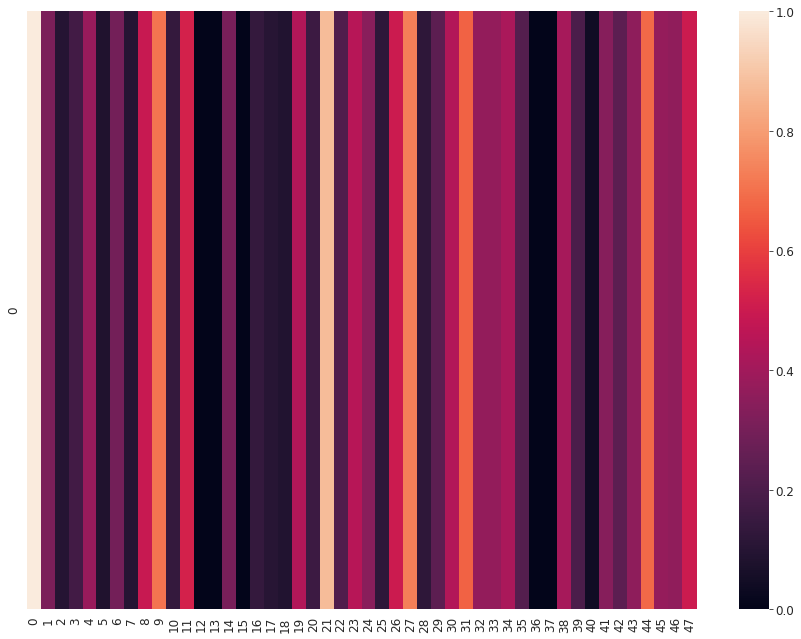

In [ ]:
#surveyData.Group_4.dropna(inplace=True)
#surveyData.Group_5.dropna(inplace=True)

#corr = e_dataframe.corr()
#for i in num :
hmap=sns.heatmap(e_dataframe)
#hmap.figure.savefig("Correlation_Heatmap_with_Seaborn.png",
 #                   format='png',
  #                  dpi=100)


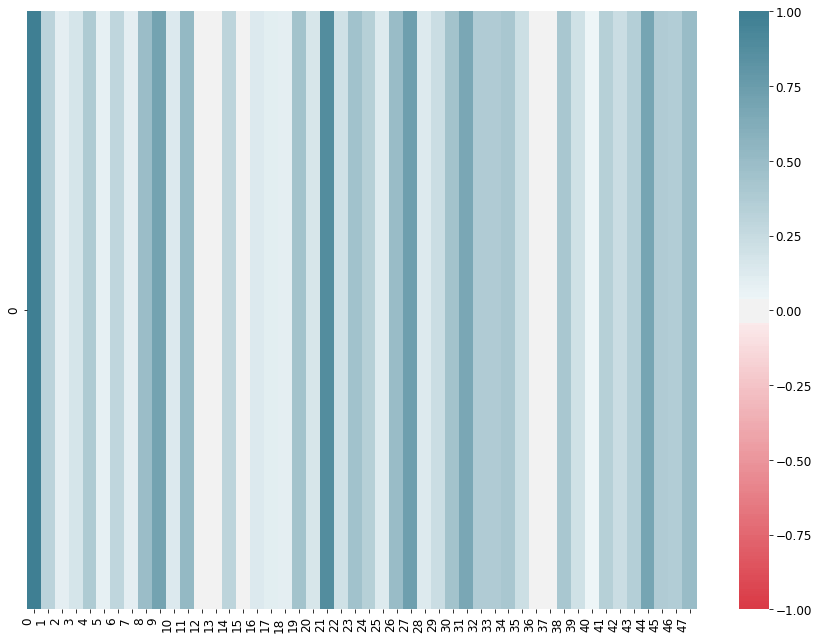

In [ ]:

ax = sns.heatmap(
    num, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 220, n=200),
    #square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

In [ ]:
field_names_list

['Response ID',
 'Age',
 'Gender',
 'Level_of_English',
 'Play_video_games',
 'Use_VR_apps_with_whd',
 'Rate_your_sensation_of_self_motion',
 'Rate_your_sensation_of_movement',
 'Rate_how_fast_you_think_you_are_moving',
 'Rate_how_fast_you_are_moving',
 'Rate_your_speed',
 'Rate_how_fast_you_are_going',
 'Rate_how_fast_the_train_is_moving',
 'Rate_the_speed_of_the_train',
 'Rate_the_velocity_of_the_train',
 'Rate_how_intense_your_sensation_of_motion_is',
 'Rate_how_strong_is_your_sensation_of_self_motion',
 'Rate_the_intensity_of_your_perception_of_self_motion',
 'Rate_the_intensity_of_your_sensation_of_self_motion_in_the_virtual_environment',
 'Rate_your_perception_of_speed',
 'Rate_your_perceived_motion',
 'Rate_your_perception_of_self_motion',
 'Rate_your_perceived _movement',
 'Group_1',
 'Group_2',
 'Group_3',
 'Group_4',
 'Group_5',
 'Group_6',
 'Group_7',
 'Group_8',
 'Group_9',
 'Group_10']



---


**GROUP 2** .


---



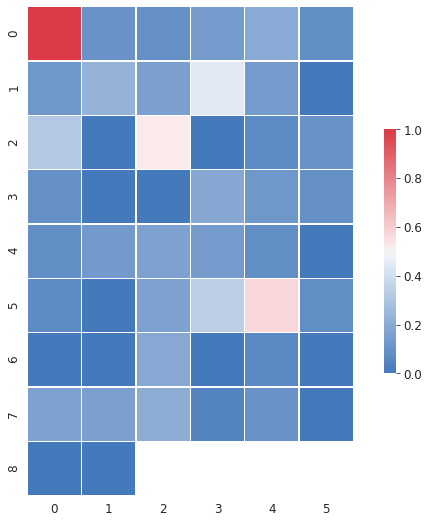

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# A list with your data slightly edited

group_2 = [1.0 , 0.10482848, 0.09245003, 0.14322297, 0.19611614,
        0.0877058 , 0.12403473, 0.23076923, 0.15724273, 0.44474959,
        0.13867505, 0.0        , 0.31448545, 0.0        , 0.52297636,
        0.0        , 0.07412493, 0.10482848, 0.09245003, 0.0        ,
        0.0        , 0.18490007, 0.12403473, 0.09805807, 0.0836242 ,
        0.13453456, 0.1672484 , 0.13867505, 0.0836242 , 0.0        ,
        0.07692308, 0.0        , 0.1672484 , 0.3363364 , 0.5728919 ,
        0.0836242 , 0.0        , 0.0        , 0.1902606 , 0.0        ,
        0.06933752, 0.0        , 0.1672484 , 0.15724273, 0.20965697,
        0.04902903, 0.10482848, 0.0,0.0,0.0       ]

# Split list
n = 6
data = [group_2[i:i + n] for i in range(0, len(group_2), n)]

# A dataframe
df = pd.DataFrame(data)

def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(df, dropDuplicates = False)


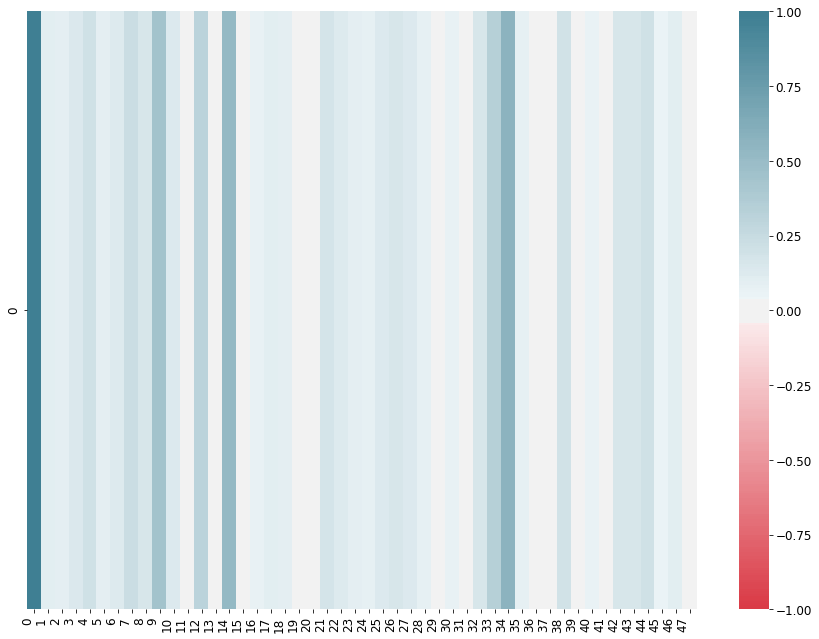

In [ ]:
# Scikit Learn
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Create the Document Term Matrix
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(ok1)
# Similarity between the first document (“Alpine snow winter boots”) with each of the other documents of the set:
from sklearn.metrics.pairwise import cosine_similarity
num1 = cosine_similarity(sparse_matrix[0:1], sparse_matrix)

ax = sns.heatmap(
    num1, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 220, n=200),
    #square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

***Converting the sentences of Group 2 to words and storing in the variable words_of_group2***

In [ ]:
words_of_group2 = convert(TG2) 

***Total count of the words are obtained.***

In [ ]:
count_of_words1 = Counter(words_of_group2)
print(count_of_words1)

Counter({'the': 30, 'of': 24, 'to': 17, 'about': 13, 'how': 12, 'I': 12, 'speed': 12, 'movement': 11, 'is': 11, 'are': 10, 'you': 8, 'fast': 8, 'sentences': 7, 'your': 6, 'train': 6, 'and': 6, 'These': 6, 'a': 6, 'or': 6, 'sensation': 6, 'my': 6, 'own': 5, 'all': 5, 'This': 4, 'what': 4, 'moving': 4, 'rating': 4, 'feeling': 4, 'refer': 4, 'motion': 4, 'like': 4, 'group': 3, 'think': 3, 'All': 3, 'The': 3, 'this': 3, 'It': 3, 'refers': 3, 'perceived': 3, 'actual': 3, 'intensity': 3, 'it': 3, 'objective': 3, 'not': 3, 'going': 3, 'with': 2, 'perception': 2, 'answer': 2, '(Group': 2, 'was': 2, 'in': 2, 'more': 2, 'motion.': 2, 'relative': 2, 'specific': 2, 'level': 2, 'Perception': 2, "you're": 2, 'should': 2, 'self': 2, 'subjective': 2, 'How': 2, 'perceive': 2, 'they': 2, 'Here': 2, 'am': 2, 'which': 2, 'that': 2, "I'm": 2, 'movement,': 2, 'felt': 2, 'for': 2, 'so': 2, 'thought': 2, 'rather': 2, 'than': 2, 'feels': 2, 'Personal': 2, 'ask': 2, '"you"': 2, 'moving,': 2, 'moving.': 2, 'has'

***Plotting the bar graph for the 30 most commonly used words by the participants***

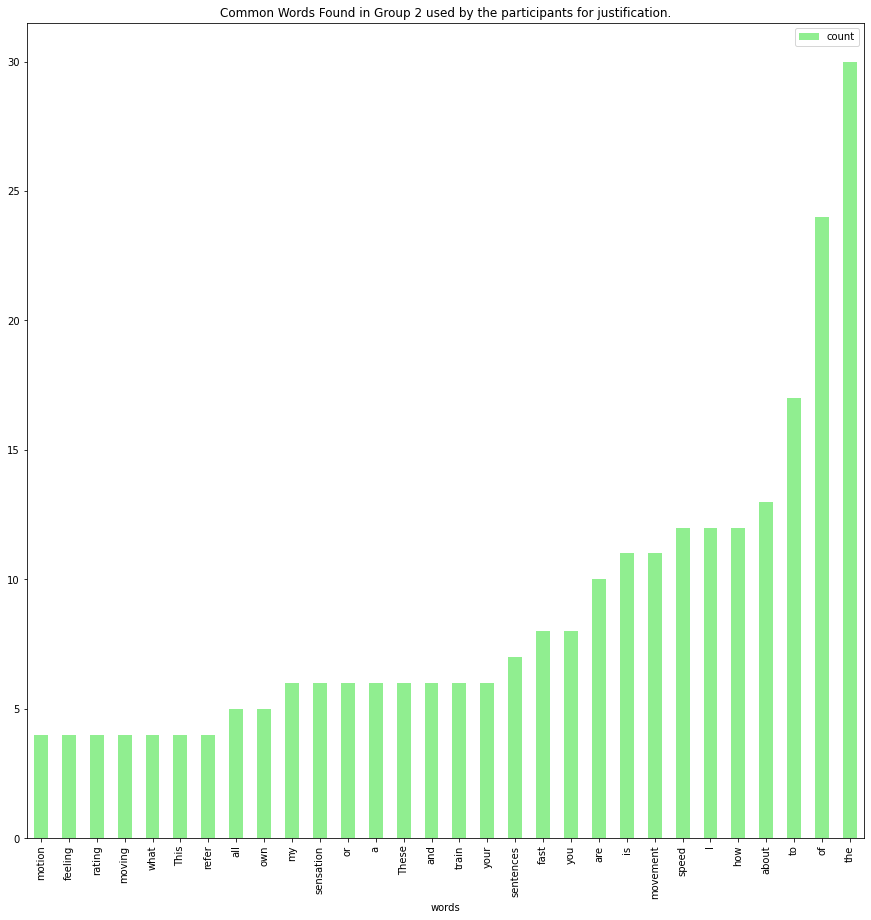

In [ ]:
count_of_words1.most_common(30)


words = pd.DataFrame(count_of_words1.most_common(30),
                             columns=['words', 'count'])

words.head()

fig, ax = plt.subplots(figsize=(15,15 )) #8,8

# Plot horizontal bar graph
words.sort_values(by='count').plot.bar(x='words',
                      y='count',
                      ax=ax,
                      color="lightgreen")

ax.set_title("Common Words Found in Group 2 used by the participants for justification.")

plt.show()

From the **top 30 words** , the **key words extracted** are **Speed** , **Movement** ,**fast**,**Sentences**,**Train** , **sensation**.

The total word count are :

- **Speed** :12
- **Movement** : 11
- **Fast** : 8
- **Sentences** : 7
- **Train** : 6
- **Sensation** : 6 

In [ ]:
CoverageACol = np.array(surveyData.Group_2.values)
count_speed =0  
count_movement =0
train_count =0
senst_count =0
sent_count =0
both_dem = 0
fast_count =0
list1=CoverageACol

 #
list3 =["speed"]
list4 =["movement"]
fa1=["fast"]
sen = ["sentences"]
list2=["train"]
senst = ["sensation"]
combined =["speed","movement"]
#combination1 = ["movement","perception"]
train = []
speed =[]
both =[]
both1 =[]
train_speed =[]
sentences = []
fast = []
sensation= []
mov = []

for word in list3:
  for phrase in list1:
    if word.lower() in phrase.lower():
      speed.append(phrase)
      count_speed = count_speed +1

for word in list4:
  for phrase in list1:
    if word.lower() in phrase.lower():
      mov.append(phrase)
      count_movement = count_movement +1

for word in combined:
  for phrase in list1:
    if word.lower() in phrase.lower():
      if word.lower() in list3 and list4: 
        both.append(phrase)
        both_dem = both_dem +1

for word in fa1:
  for phrase in list1:
    if word.lower() in phrase.lower():
      fast.append(phrase)
      fast_count = fast_count +1

for word in sen:
  for phrase in list1:
    if word.lower() in phrase.lower():
      sentences.append(phrase)
      sent_count = sent_count +1

for word in list2:
  for phrase in list1:
    if word.lower() in phrase.lower():
      train.append(phrase)
      train_count = train_count +1

for word in senst:
  for phrase in list1:
    if word.lower() in phrase.lower():
      sensation.append(phrase)
      senst_count = senst_count +1

#for word in combination1:
#  for phrase in list1:
#    if word.lower() in phrase.lower():
#      if word.lower() in list4 and list5: 
#        both1.append(phrase)
#        count5 = count5 +1

#unique_result = set(train)
#print(train)
#print(speed)
#print("The sentences for both are :",both)
#print("The sentences with sentences ",sentences)
#print(unique_result)
print("Train Count :",train_count)
print("Speed Count",count_speed)
print("Sensation Count",senst_count)
print("sentences count",sent_count)
print("fast count",fast_count)
print("movement count",count_movement)
print("speed and movement count",both_dem)
#print("perception count",percep_count)
#print("both perception and moveme count",count5)

Train Count : 8
Speed Count 15
Sensation Count 8
sentences count 7
fast count 6
movement count 14
speed and movement count 15


In [ ]:
speed 

['This group has to do with what you think about your own speed.',
 'These instructions are ambivalent. It is unclear if the intended answer is a speed (Group 1) or an indication of how immersive your sensation of movement was (Group 3).',
 'The subject is train - more about the speed of the train itself',
 'These senstences are all about my perception of my own speed',
 'This group refers to all the sentences relative to your actual speed',
 'it is about you feeling the speed',
 "These sentences refer to what you think about your speed... Perception doesn't mean you're right",
 "describes one's estimate of the objective speed",
 "measure of the train's speed",
 'Measuring intensity of the perceived feeling around movement, not necessarily speed',
 'All sentences refer to the speed of the train',
 "Asking what speed you THINK you're going (personal to your own perspective)",
 'Included the word speed, so I thought they may require a number answer',
 "This group all suggest I should rat

In [ ]:
mov

['contains items relating to perception of movement',
 'These instructions are ambivalent. It is unclear if the intended answer is a speed (Group 1) or an indication of how immersive your sensation of movement was (Group 3).',
 "These sentences belong to the category 'perception'. Each sentence refers to perceived movement or motion, as opposed to actual motion.",
 'Think I should have grouped self motion and self movement into two categories',
 'Actual movement',
 'It is related to our sensation and movement',
 'they refer to the objective movement of the train.',
 'Here I am being asked to talk about my feeling of movement/motion, which is subjective and internal',
 'Contains sentences that refer to how a person perceives their own movement',
 'Measuring intensity of the perceived feeling around movement, not necessarily speed',
 'Here I am rating the actual movement',
 'This felt like a cognitive assessment for my movement, like, "hmm 45mph"',
 'grouping the movement of the train',


In [ ]:
fast


['The train and I are one, this is about how fast we are moving ',
 'How fast you perceive you are moving',
 "How fast I think I'm going",
 "This group all suggest I should rate how fast I'm going, i.e. more objectively guess at the speed of the train rather than what it feels like or how I perceive it. ",
 'These sentences all ask how fast "you" are moving, rather than how fast the "train" is moving. They are all simple questions that ask for on objective evaluation of how fast "you" are moving. ',
 'Rate my senses, how well I perceived and how strong the sensation was, not how fast I thought I was moving like the previous group.']

In [ ]:
sentences 

["These sentences belong to the category 'perception'. Each sentence refers to perceived movement or motion, as opposed to actual motion.",
 'This group refers to all the sentences relative to your actual speed',
 "These sentences refer to what you think about your speed... Perception doesn't mean you're right",
 'Contains sentences that refer to how a person perceives their own movement',
 'All sentences refer to the speed of the train',
 'These sentences all ask how fast "you" are moving, rather than how fast the "train" is moving. They are all simple questions that ask for on objective evaluation of how fast "you" are moving. ',
 'These sentences are about the extent to which the observer feels like he himself is moving, or the strength of this feeling.']

In [ ]:
train

['The train and I are one, this is about how fast we are moving ',
 'The subject is train - more about the speed of the train itself',
 "measure of the train's speed",
 'they refer to the objective movement of the train.',
 'All sentences refer to the speed of the train',
 'grouping the movement of the train',
 "This group all suggest I should rate how fast I'm going, i.e. more objectively guess at the speed of the train rather than what it feels like or how I perceive it. ",
 'These sentences all ask how fast "you" are moving, rather than how fast the "train" is moving. They are all simple questions that ask for on objective evaluation of how fast "you" are moving. ']

In [ ]:
sensation

['All involve sensation, how the video makes you feel',
 'These instructions are ambivalent. It is unclear if the intended answer is a speed (Group 1) or an indication of how immersive your sensation of movement was (Group 3).',
 'The specific feature of grade or level of intensity of sensation or perception.',
 'Decision making about Sensation but not given value scale',
 'It is related to our sensation and movement',
 'refers to your sensation relative to the object you are in (but I went with instinct)',
 'sensation',
 'Rate my senses, how well I perceived and how strong the sensation was, not how fast I thought I was moving like the previous group.']

In [ ]:
both

['This group has to do with what you think about your own speed.',
 'These instructions are ambivalent. It is unclear if the intended answer is a speed (Group 1) or an indication of how immersive your sensation of movement was (Group 3).',
 'The subject is train - more about the speed of the train itself',
 'These senstences are all about my perception of my own speed',
 'This group refers to all the sentences relative to your actual speed',
 'it is about you feeling the speed',
 "These sentences refer to what you think about your speed... Perception doesn't mean you're right",
 "describes one's estimate of the objective speed",
 "measure of the train's speed",
 'Measuring intensity of the perceived feeling around movement, not necessarily speed',
 'All sentences refer to the speed of the train',
 "Asking what speed you THINK you're going (personal to your own perspective)",
 'Included the word speed, so I thought they may require a number answer',
 "This group all suggest I should rat


- **25%** of the users have used the phrase **speed** for classifying the sentences under group 2.
- **22.91 %** of the participants have used the phases "**Movement** for classifying setences under Group 2.
- **17 %** of the participant has used the word **"Sentences"** for justification of Group 1 
- **16 %** of the participants have used the term **"Fast"** ,for classifying sentences under Group 2. 
- Less than **16 %** of the participants have used the terms "**Train**" and "**Sensation**".



---


**GROUP 3** .


---



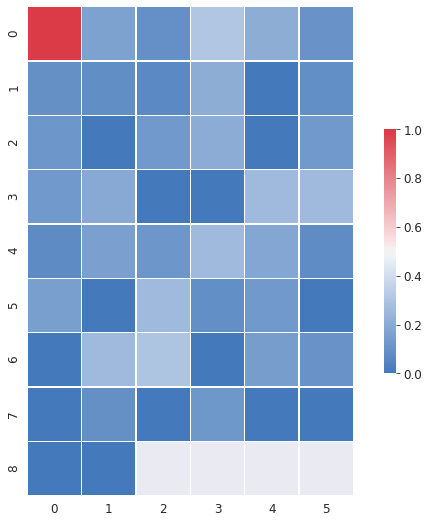

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# A list with your data slightly edited

group_3 = [1.0        , 0.16666667, 0.0949158 , 0.30618622, 0.21004201,
        0.10206207, 0.09128709, 0.08333333, 0.070014  , 0.21004201,
        0.0        , 0.08885233, 0.11785113, 0.0        , 0.12909944,
        0.20412415, 0.0        , 0.12909944, 0.12909944, 0.19245009,
        0.0        , 0.0        , 0.25819889, 0.25819889, 0.0745356 ,
        0.15811388, 0.11785113, 0.25819889, 0.18257419, 0.08006408,
        0.15309311, 0.0        , 0.26111648, 0.08703883, 0.12909944,
        0.0        , 0.0        , 0.26111648, 0.30123204, 0.0        ,
        0.14784425, 0.10910895, 0.0        , 0.09128709, 0.0        ,
        0.12309149, 0.0        , 0.0,0.0,0.0            ]

# Split list
n = 6
data = [group_3[i:i + n] for i in range(0, len(group_3), n)]

# A dataframe
df = pd.DataFrame(data)

def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'dark')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(df, dropDuplicates = False)

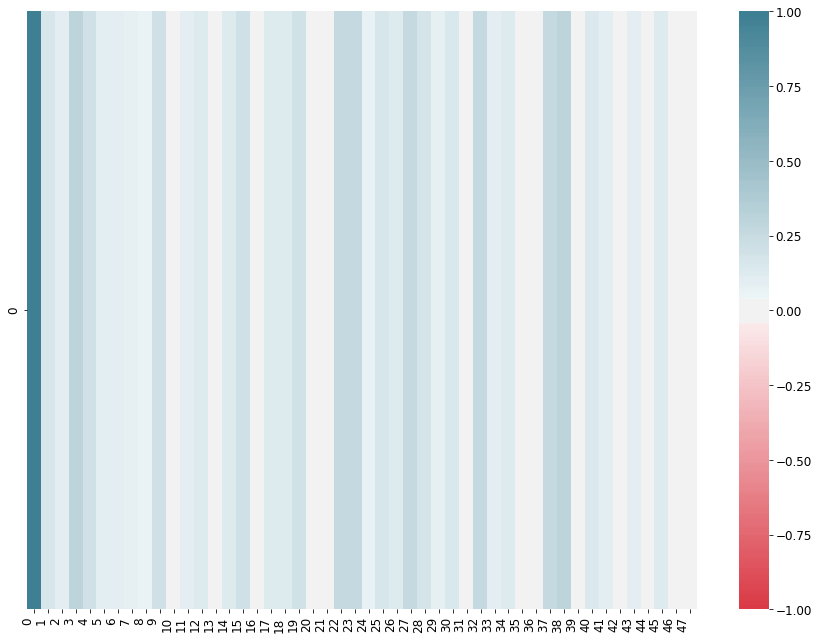

In [ ]:
# Scikit Learn
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Create the Document Term Matrix
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(ok3)
# Similarity between the first document (“Alpine snow winter boots”) with each of the other documents of the set:
from sklearn.metrics.pairwise import cosine_similarity
num2 = cosine_similarity(sparse_matrix[0:1], sparse_matrix)

ax = sns.heatmap(
    num2, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 220, n=200),
    #square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

***Converting the sentences of Group 3 to words and storing in the variable words_of_group3***

In [ ]:
words_of_group3 = convert(TG3) 

***Total count of the words are obtained.***

In [ ]:
count_of_words2 = Counter(words_of_group3)
print(count_of_words2)

Counter({'the': 34, 'of': 28, 'to': 19, 'speed': 13, 'how': 11, 'is': 11, 'about': 11, 'train': 9, 'your': 8, 'you': 8, 'movement': 8, 'perception': 7, 'I': 7, 'my': 7, 'in': 6, 'a': 6, 'are': 6, 'sensation': 6, 'This': 5, 'own': 5, 'moving': 5, 'These': 5, 'and': 5, 'sentences': 5, 'with': 4, 'All': 4, 'all': 4, 'rate': 4, 'not': 4, 'refer': 4, 'but': 4, 'group': 3, 'be': 3, 'feeling': 3, 'ask': 3, 'or': 3, 'The': 3, '-': 3, 'also': 3, 'as': 3, 'they': 3, 'than': 3, 'rating': 3, 'quality': 3, 'related': 3, 'me': 3, 'asked': 3, 'which': 3, 'motion': 3, "I'm": 3, 'fast': 3, 'do': 2, 'what': 2, 'actually': 2, 'items': 2, 'it': 2, 'feels': 2, 'perception,': 2, 'mind': 2, 'passing,': 2, 'sensation,': 2, 'i.e.': 2, 'virtual': 2, 'train,': 2, 'environment': 2, 'together': 2, 'both': 2, 'rather': 2, 'actual': 2, 'perceive': 2, 'movement.': 2, 'whatever': 2, 'feelings': 2, 'subjective': 2, 'objective': 2, 'perception?': 2, 'It': 2, 'something': 2, 'Here': 2, 'am': 2, 'being': 2, 'THE': 2, 'at'

***Plotting the bar graph for the 30 most commonly used words by the participants***

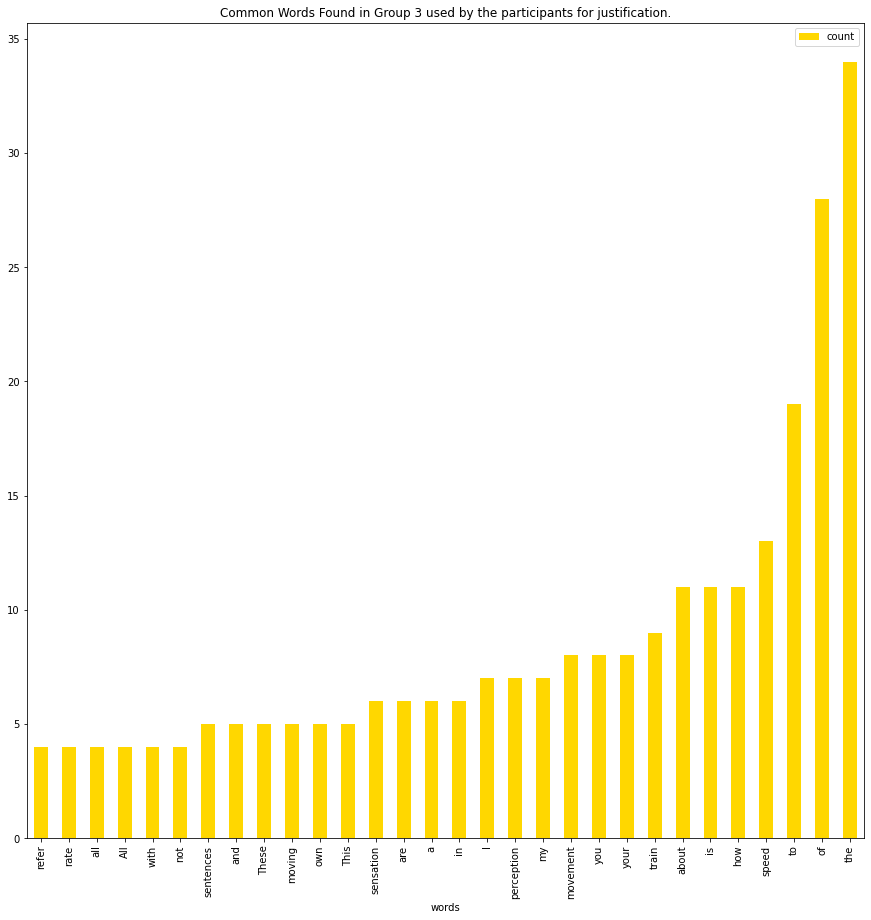

In [ ]:
count_of_words2.most_common(30)


words = pd.DataFrame(count_of_words2.most_common(30),
                             columns=['words', 'count'])

words.head()

fig, ax = plt.subplots(figsize=(15,15 )) #8,8

# Plot horizontal bar graph
words.sort_values(by='count').plot.bar(x='words',
                      y='count',
                      ax=ax,
                      color="gold")

ax.set_title("Common Words Found in Group 3 used by the participants for justification.")

plt.show()

From the **top 30 words** , the key words extracted are **Speed** , **Train** , **movement** , **Perception**,**Sensation**.

The total word count are :

- **Speed** :12
- **Movement** : 11
- **Train** : 9
- **Perception** : 8
- **Sensation** : 6

In [ ]:
CoverageACol = np.array(surveyData.Group_3.values)
count_speed =0  
count_movement =0
train_count =0
perception_count =0
senst_count =0
#both_dem = 0
#fast_count =0
list1=CoverageACol

 #
list3 =["speed"]
list4 =["movement"]
list2=["train"]
perception =["perception"]
senst = ["sensation"]
#combination1 = ["movement","perception"]
speed =[]
mov = []
train = []
perception_all =[]
sensation= []


for word in list3:
  for phrase in list1:
    if word.lower() in phrase.lower():
      speed.append(phrase)
      count_speed = count_speed +1

for word in list4:
  for phrase in list1:
    if word.lower() in phrase.lower():
      mov.append(phrase)
      count_movement = count_movement +1

for word in list2:
  for phrase in list1:
    if word.lower() in phrase.lower():
        train.append(phrase)
        train_count = train_count +1

for word in perception:
  for phrase in list1:
    if word.lower() in phrase.lower():
      perception_all.append(phrase)
      perception_count = perception_count +1

for word in senst:
  for phrase in list1:
    if word.lower() in phrase.lower():
      sensation.append(phrase)
      senst_count = senst_count +1


print("Train Count :",train_count)
print("Speed Count",count_speed)
print("Sensation Count",senst_count)
print("movement count",count_movement)
print("perception count",perception_count)
#print("both perception and moveme count",count5)

Train Count : 10
Speed Count 14
Sensation Count 8
movement count 12
perception count 12


In [ ]:
speed

['This group has to do with what your own speed actually is.',
 "The subject is myself - not only about the speed of the train, also includes myself's feeling of the train and whole environment",
 'These sentences are all about the speed of the train',
 'subjective speed',
 'describes how the speed feels',
 'Decision making about my speed',
 'its asking you to be objective about the speed',
 "perception of one's own speed ",
 'Here I am being asked about the movement of something other than me - i.e THE train, THE speed/velocity, which is separate to me',
 "The speed which I'm actually at",
 'Measuring the actual speed rather than perceived speed',
 'This felt more like a subjective assessment for my movement, like "really fast", and also not just speed, but also different feelings related to movement: e.g. smoothness, jitter',
 "estimate of tain's speed (attempt at objectivity)",
 'These sentences are about judging the speed of egocentric movement.']

In [ ]:
mov

['I grouped these two sentences together as they both refer to sensation, rather than perception or actual movement',
 'This group refers to how you perceive the movement of both yourself and the train',
 'All about movement.',
 'Sensation of movement',
 'they refer to the movement of the subject- me as something objectively measurable',
 'Here I am being asked about the movement of something other than me - i.e THE train, THE speed/velocity, which is separate to me',
 'Here I am rating the (spontaneous, but nonetheless) effort with which I assessed that movement',
 'This felt more like a subjective assessment for my movement, like "really fast", and also not just speed, but also different feelings related to movement: e.g. smoothness, jitter',
 'Asking how much you are feeling i.e. Are you sensing the train movement in your own body?',
 'All seemed focused on the sensation and reality of movement when using a headset',
 'These sentences are similar to those in Group 2, but they ask ho

In [ ]:
train

["The subject is myself - not only about the speed of the train, also includes myself's feeling of the train and whole environment",
 'These sentences are all about the speed of the train',
 'This group refers to how you perceive the movement of both yourself and the train',
 'it is about the train moving',
 'Regarding the train',
 'Here I am being asked about the movement of something other than me - i.e THE train, THE speed/velocity, which is separate to me',
 'Asking how much you are feeling i.e. Are you sensing the train movement in your own body?',
 'These sentences are similar to those in Group 2, but they ask how fast the train is moving instead of how fast you are moving. They all ask for an objective evaluation of the train\'s movements, but not "your" movements. ',
 'here you are interested in the train motion',
 'asked to rate how fats the train is moving from the perspective shown by the video']

In [ ]:
perception_all

['All involve perception, how your mind is analyzing all factors (rate of tracks passing, rate of walls passing, end of tunnel not getting closer, etc)',
 "It's about your perception itself in a virtual space",
 'I grouped these two sentences together as they both refer to sensation, rather than perception or actual movement',
 'The broader question of rating in whatever the user wants to rate with the quality of a sensation or a perception of a phenomenon (could be realistic, intense, fun, boring, etc., whatever is in the mind of the interpreter of the question)',
 'Ambiguous - about the quality of the perception?',
 "perception of one's own speed ",
 'It is related to perception',
 'sensing give sense of direction ie perception(but I went with instinct)',
 'grouping my perceptions and personal views together',
 "Group 3 all relate to perception,  how fast I 'think' I'm going. This is confusing though, how can I 'rate' my own perception? It sounds as though I'm being asked to judge th

In [ ]:
sensation

['These items ask you to rate your sensation, i.e. whether your sensations were realistic or intense.',
 'I grouped these two sentences together as they both refer to sensation, rather than perception or actual movement',
 'The broader question of rating in whatever the user wants to rate with the quality of a sensation or a perception of a phenomenon (could be realistic, intense, fun, boring, etc., whatever is in the mind of the interpreter of the question)',
 'Sensation of movement',
 'quality of the sensation of oneself moving',
 'All seemed focused on the sensation and reality of movement when using a headset',
 'your sensation = how strong is your sensation',
 'Rating sensation ']


- **29%** of the users have used the phrase **speed** for classifying the sentences under group 3.
- **25 %** of the participants have used the phases "**Movement** and **Perception** for classifying setences under Group 3.
- **20 %** of the participant has used the word **"Train"** for justification of Group 1 
- Less than **20 %** of the participants have used the term **"Train"**.
---



*Obtaining the feature count and the numeric vector representation of user justifications for* **GROUP 4** .


---



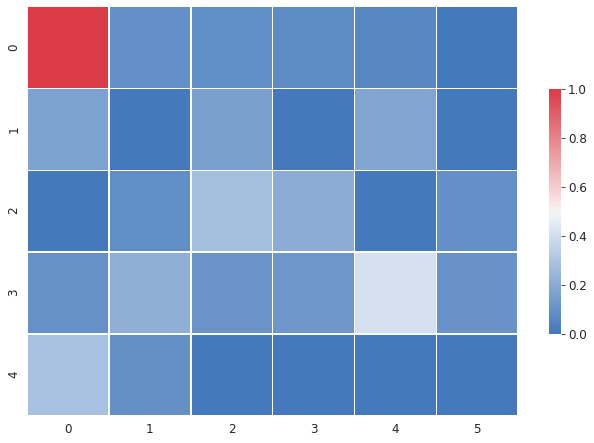

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# A list with your data slightly edited

group_4 = [1.0        , 0.09622504, 0.08333333, 0.08006408, 0.05892557,
        0.0        , 0.16666667, 0.0        , 0.16012815, 0.0        ,
        0.17407766, 0.0        , 0.0        , 0.08333333, 0.27386128,
        0.20412415, 0.0        , 0.09622504, 0.09901475, 0.21821789,
        0.1132277 , 0.11785113, 0.41182635, 0.10910895, 0.28867513,
        0.09128709, 0.0,0.0,0.0,0.0         ]

# Split list
n = 6
data = [group_4[i:i + n] for i in range(0, len(group_4), n)]

# A dataframe
df = pd.DataFrame(data)

def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'darkgrid')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(df, dropDuplicates = False)

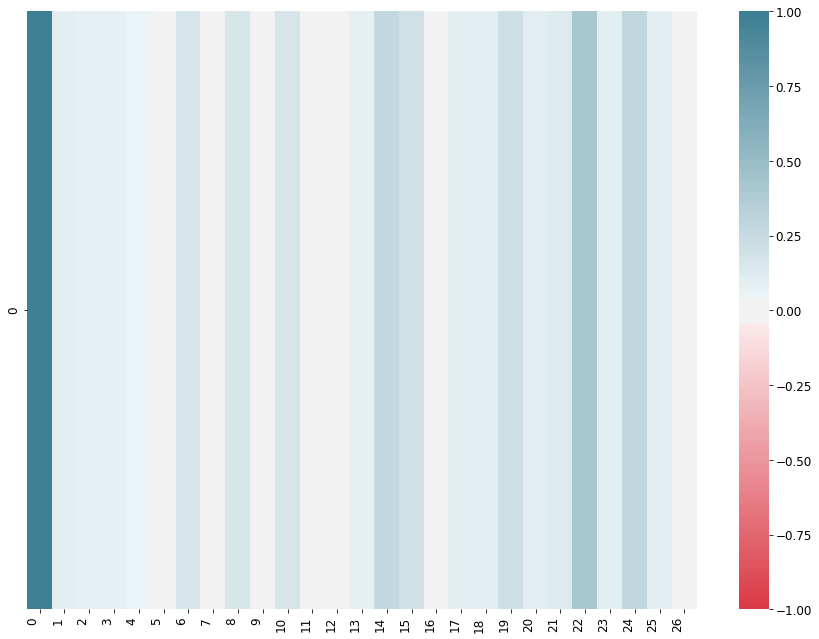

In [ ]:
# Scikit Learn
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Create the Document Term Matrix
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(ok4)
# Similarity between the first document (“Alpine snow winter boots”) with each of the other documents of the set:
from sklearn.metrics.pairwise import cosine_similarity
num3 = cosine_similarity(sparse_matrix[0:1], sparse_matrix)

ax = sns.heatmap(
    num3, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 220, n=200),
    #square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

***Converting the sentences of Group 4 to words and storing in the variable words_of_group4***

In [ ]:
words_of_group4 = convert(TG4) 

***Total count of the words are obtained.***

In [ ]:
count_of_words3 = Counter(words_of_group4)
print(count_of_words3)

Counter({'to': 16, 'the': 16, 'of': 15, 'about': 11, 'is': 11, 'speed': 9, 'motion': 8, 'you': 8, 'how': 7, 'I': 5, 'it': 5, 'be': 5, 'A': 4, 'intensity': 4, 'sentences': 4, 'my': 4, 'own': 4, 'movement': 4, 'moving': 4, 'from': 4, 'group': 3, 'your': 3, 'and': 3, 'but': 3, 'in': 3, 'sensation': 3, 'train': 3, 'asking': 3, 'that': 3, 'a': 3, 'ask': 3, 'This': 2, 'do': 2, 'with': 2, '1': 2, 'either': 2, 'feeling': 2, 'These': 2, 'all': 2, 'perception': 2, 'refer': 2, 'or': 2, 'All': 2, 'which': 2, 'Here': 2, 'am': 2, 'rather': 2, 'than': 2, 'rating': 2, 'as': 2, 'Group': 2, '-': 2, 'this': 2, 'what': 2, 'B.': 2, 'has': 1, 'makes': 1, 'feel.': 1, 'mix': 1, 'between': 1, '2': 1, "doesn't": 1, 'fit': 1, 'more': 1, 'instead': 1, 'are': 1, 'grouped': 1, 'these': 1, 'together': 1, 'based': 1, 'on': 1, 'intensity.': 1, 'Each': 1, 'them': 1, 'terms': 1, 'perception.': 1, 'trains': 1, 'movement.': 1, 'strong': 1, 'Personal': 1, 'describes': 1, 'extent': 1, 'one': 1, 'believes': 1, 'themselves': 

In [ ]:
df = count_of_words3.values()

In [ ]:
df

dict_values([2, 3, 1, 16, 2, 2, 7, 3, 8, 1, 8, 1, 4, 1, 1, 2, 3, 1, 3, 1, 1, 3, 2, 1, 11, 16, 2, 15, 4, 1, 9, 2, 4, 1, 2, 4, 2, 4, 5, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 2, 1, 2, 1, 1, 5, 11, 1, 1, 4, 1, 1, 2, 1, 1, 1, 5, 4, 1, 1, 3, 3, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
akshu = count_of_words3.keys()

In [ ]:
akshu

dict_keys(['This', 'group', 'has', 'to', 'do', 'with', 'how', 'your', 'motion', 'makes', 'you', 'feel.', 'A', 'mix', 'between', '1', 'and', '2', 'but', "doesn't", 'fit', 'in', 'either', 'more', 'about', 'the', 'feeling', 'of', 'intensity', 'instead', 'speed', 'These', 'sentences', 'are', 'all', 'my', 'perception', 'own', 'I', 'grouped', 'these', 'together', 'based', 'on', 'intensity.', 'Each', 'them', 'refer', 'terms', 'sensation', 'or', 'perception.', 'All', 'trains', 'movement.', 'it', 'is', 'strong', 'Personal', 'movement', 'describes', 'extent', 'which', 'one', 'believes', 'themselves', 'be', 'moving', 'Decision', 'making', 'train', 'asking', 'subjective', 'About', 'perpception', 'Here', 'am', 'being', 'asked', 'intense', 'feeing', 'Sentences', 'that', 'relate', 'a', 'person', 'senses', 'their', 'Self', 'Measuring', 'rather', 'than', 'just', 'rating', 'thought', 'occurring', 'level', '(but', 'as', 'opposed', 'Group', '6', 'ambiguous,', 'leaving', 'open', 'option', 'zero', 'because'

In [ ]:
#val_of_dict = ((np.asarray(df)))
#val_of_dict.reshape(6,3)

In [ ]:
#akshu1= ((np.asarray(akshu)))

In [ ]:
#check = []

#check.append([np.array(val_of_dict),np.array(akshu1)])
#check

In [ ]:
#import seaborn as sb

#heat_map = sb.heatmap(val_of_dict)


In [ ]:
#df1

***Plotting the bar graph for the 30 most commonly used words by the participants***

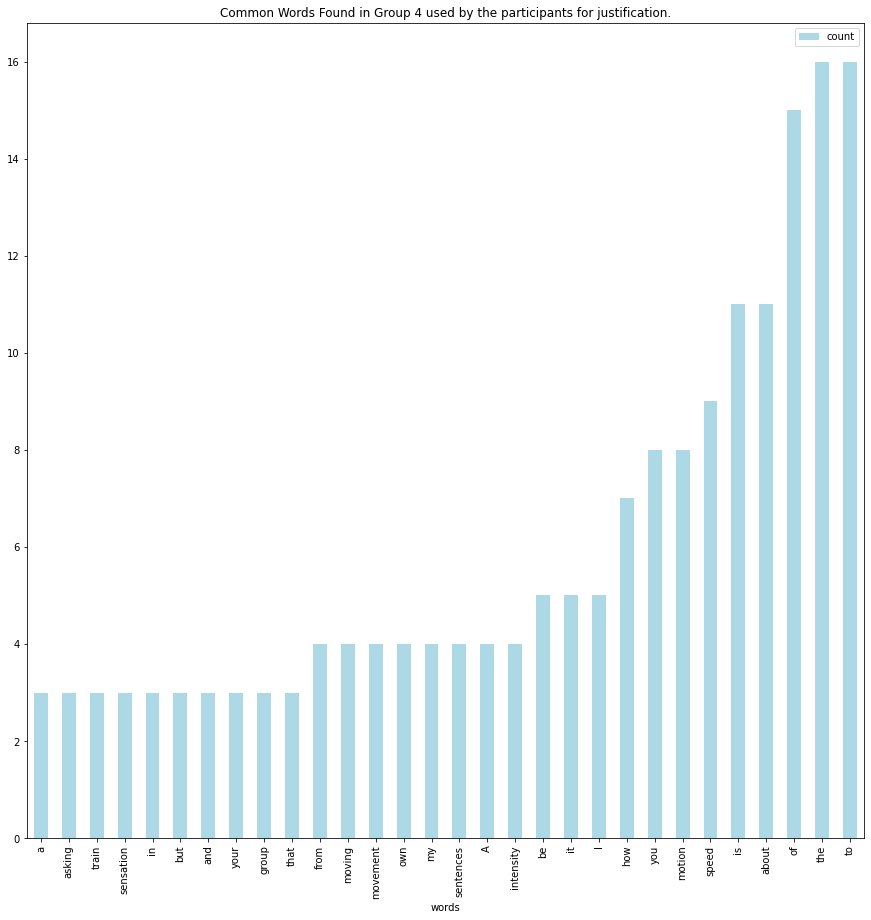

In [ ]:
# Takes the Top 30 commonly used words
count_of_words3.most_common(30)


words = pd.DataFrame(count_of_words3.most_common(30),
                             columns=['words', 'count'])

words.head()

fig, ax = plt.subplots(figsize=(15,15 )) #8,8

# Plot horizontal bar graph
words.sort_values(by='count').plot.bar(x='words',
                      y='count',
                      ax=ax,
                      color="lightblue")

ax.set_title("Common Words Found in Group 4 used by the participants for justification.")

plt.show()

From the **top 30 words** , the key words extracted are **Speed** ,**Motion**,**intensity** ,**sentences** ,**movement**.

The total word count are :

- **Speed** :9
- **Motion** : 8
- **Intensity** : 4
- **Sentences** : 4
- **Movement** : 4

In [ ]:
CoverageACol = np.array(surveyData.Group_4.values)
count_speed =0  
count_movement =0
intensity_count =0
motion_count =0
sentences_count =0
list1=CoverageACol

 #
list3 =["speed"]
list4 =["motion"]
list2=["intensity"]
sentences =["sentences"]
movement = ["movement"]

speed =[]
motion = []
intensity = []
sentences =[]
movement= []


for word in list3:
  for phrase in list1:
    if word.lower() in phrase.lower():
      speed.append(phrase)
      count_speed = count_speed +1

for word in list4:
  for phrase in list1:
    if word.lower() in phrase.lower():
      motion.append(phrase)
      motion_count = motion_count +1

for word in list2:
  for phrase in list1:
    if word.lower() in phrase.lower():
        intensity.append(phrase)
        intensity_count = intensity_count +1

for word in sentences:
  for phrase in list1:
    if word.lower() in phrase.lower():
      sentences.append(phrase)
      sentences_count = sentences_count +1

for word in senst:
  for phrase in list1:
    if word.lower() in phrase.lower():
      movement.append(phrase)
      count_movement = count_movement +1


print("Motion Count :",motion_count)
print("Speed Count",count_speed)
#print("Sentences Count",sentences_count)
print("movement count",count_movement)
print("intenity count",intensity_count)
#print("both perception and moveme count",count5)

Motion Count : 7
Speed Count 8
movement count 3
intenity count 4


In [ ]:
speed

['more about the feeling of motion intensity instead of speed',
 'it is about how strong your feeling of speed is',
 'Decision making about train speed',
 'asking you be to be subjective about the speed',
 'Measuring the sensation of the movement rather than just speed',
 'level of speed (but as opposed to Group 6 it is ambiguous, leaving open the option that speed is zero because nothing is in actual fact moving)',
 'All sentences refer to your own speed',
 "Same as 1 but less specific - In this case we assume you mean the speed of the train but it's not 100% clear"]

In [ ]:
motion

['This group has to do with how your motion makes you feel.',
 'more about the feeling of motion intensity instead of speed',
 'These sentences are all about my perception of my own motion',
 'Sentences that relate to how a person senses their own motion',
 'Self motion',
 'estimate of own motion  (attempt at objectivity)',
 'here you ask about motion (generic) and referred to me, so I understand you ask about my motion']

In [ ]:
intensity

['more about the feeling of motion intensity instead of speed',
 'I grouped these sentences together based on intensity. Each of them refer to intensity in terms of either sensation or perception.',
 'About the intensity of the perception',
 'perpception of intensity']

In [ ]:
sentences

[]

In [ ]:
movement

['I grouped these sentences together based on intensity. Each of them refer to intensity in terms of either sensation or perception.',
 'Measuring the sensation of the movement rather than just speed',
 'rating my sensation']


- **16%** of the users have used the phrase **speed** for classifying the sentences under group 4.
- Less than **16 %** of the participants have used the phases "**Motion** , **Movement** and **Intensity** for classifying setences under Group 4.
---



*Obtaining the feature count and the numeric vector representation of user justifications for* **GROUP 5** .

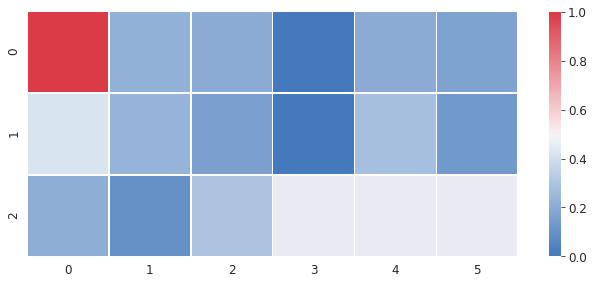

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# A list with your data slightly edited

group_5 = [1.0        , 0.2236068 , 0.2       , 0.0        , 0.2       ,
        0.16903085, 0.42426407, 0.23717082, 0.15811388, 0.0        ,
        0.27975144, 0.12909944, 0.21213203, 0.1       , 0.3        ]

# Split list
n = 6
data = [group_5[i:i + n] for i in range(0, len(group_5), n)]

# A dataframe
df = pd.DataFrame(data)

def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'dark')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(df, dropDuplicates = False)

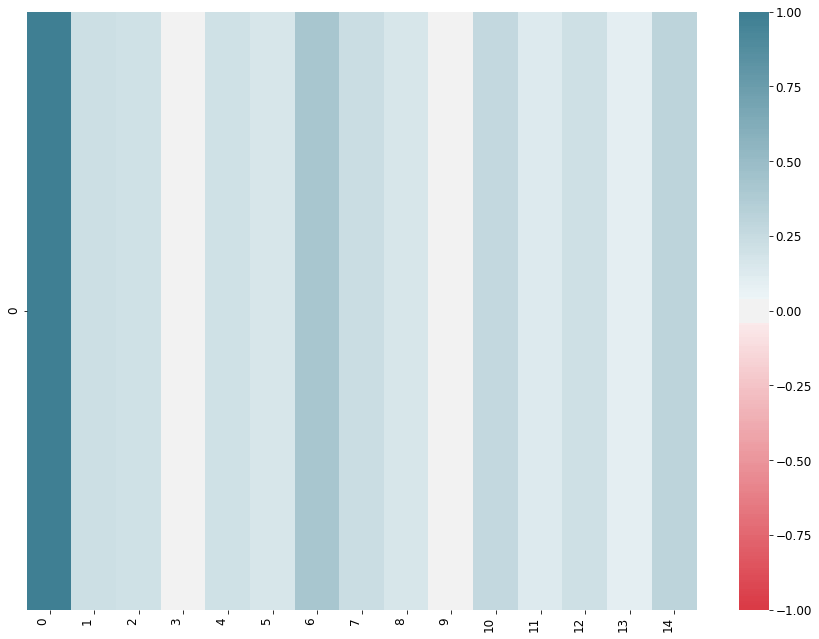

In [ ]:
# Scikit Learn
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Create the Document Term Matrix
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(ok5)
# Similarity between the first document (“Alpine snow winter boots”) with each of the other documents of the set:
from sklearn.metrics.pairwise import cosine_similarity
num0 = cosine_similarity(sparse_matrix[0:1], sparse_matrix)

ax = sns.heatmap(
    num0, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 220, n=200),
    #square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

***Converting the sentences of Group 5 to words and storing in the variable words_of_group5***

In [ ]:
words_of_group5 = convert(TG5)

***Total count of the words are obtained.***

In [ ]:
count_of_words5 = Counter(words_of_group5)
print(count_of_words5)

Counter({'of': 10, 'to': 6, 'is': 4, 'about': 4, 'movement': 4, 'perception': 4, 'This': 3, 'motion': 3, '3': 3, 'group': 2, 'your': 2, 'in': 2, 'feeling': 2, 'sensation': 2, 'the': 2, 'speed': 2, 'Similar': 2, 'Group': 2, '-': 2, 'own': 2, 'a': 2, 'more': 2, 'general': 2, 'be': 2, 'as': 2, 'has': 1, 'do': 1, 'with': 1, 'understanding': 1, 'overall,': 1, 'irrespective': 1, 'what,': 1, 'particular,': 1, 'moving.': 1, 'what': 1, "you're": 1, 'actually': 1, 'it': 1, 'Speed': 1, 'describes': 1, 'Decision': 1, 'making': 1, 'my': 1, 'rating': 1, 'what?': 1, 'Your': 1, 'movement?': 1, 'Ambiguous': 1, 'movement,': 1, 'not': 1, 'limited': 1, 'General': 1, 'sentences': 1, 'relating': 1, 'how': 1, 'person': 1, 'senses': 1, 'quality': 1, 'terms': 1, 'than': 1, '3,': 1, 'i.e.': 1, 'can': 1, 'self': 1, 'or': 1, 'just': 1, 'train': 1, 'an': 1, 'object': 1, 'ro': 1, 'Same': 1, 'but': 1, 'sensing': 1, 'train.': 1, 'perceived': 1, '(acknowledges': 1, 'subjectivity)': 1, 'you': 1, 'ask': 1, 'self-motion'

***Plotting the bar graph for the 30 most commonly used words by the participants***

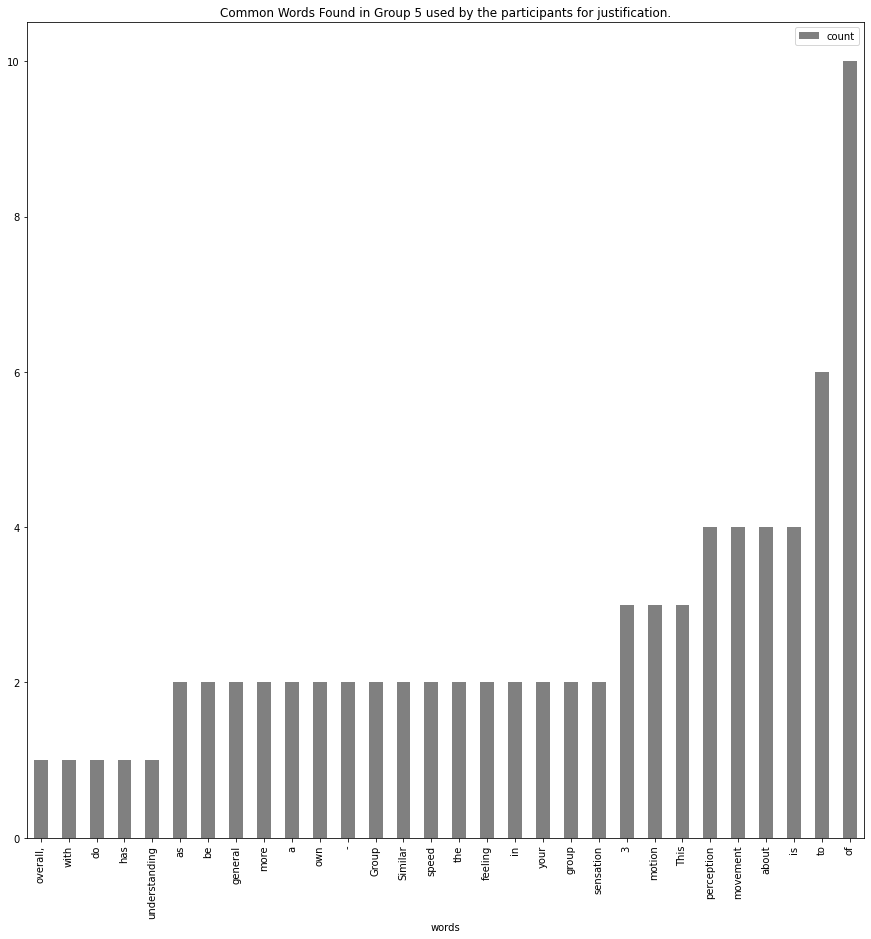

In [ ]:
# Takes the Top 30 commonly used words
count_of_words5.most_common(30)


words = pd.DataFrame(count_of_words5.most_common(30),
                             columns=['words', 'count'])

words.head()

fig, ax = plt.subplots(figsize=(15,15 )) #8,8

# Plot horizontal bar graph
words.sort_values(by='count').plot.bar(x='words',
                      y='count',
                      ax=ax,
                      color="grey")

ax.set_title("Common Words Found in Group 5 used by the participants for justification.")

plt.show()

From the **top 30 words** , the key words extracted are **Movement** ,**Perception**,**3** ,**motion** ,**sensation**.

The total word count are :

- **Movement** :4
- **Perception** : 4
- **3** : 3
- **motion** : 3
- **Sensation** : 2

- Most  of the users have used the phrase **Movement** and **Perception** for classifying the sentences under group 5.
- Some of the users have used the term  **3** , **motion** ,  **sensation**.
---

**Sentences Similarity**


---



***Using python library Sequence Matcher to find similarity between two sentences , a value above and equal to 0.60 indicates that the sentences are similar.***

User's justification comments for **Group 1**

In [ ]:
from difflib import SequenceMatcher

def Similar(a,b):
  return SequenceMatcher(None, a, b).ratio()


col_list = [23]
df = pd.read_csv("results-survey173122.csv", usecols=col_list)
#df.astype(str)
#df
rows = len(df)


CoverageACol = np.array(df.values)
CoverageACol
for val in range(47):
  str1 = CoverageACol[val,0]
  #print(str1)
  str2 = CoverageACol[val+1,0]
  #print(str2)
  if val <= 47:
    a= Similar(str1,str2)
    if a >= 0.60:
      print(a)
      #print(CoverageACol[val,0])
      print(str1)
      print(str2)


0.6122448979591837
"Perceived motion"
"Personal perception of motion"


User's justification comments for **Group 2**

In [ ]:
from difflib import SequenceMatcher

def Similar(a,b):
  return SequenceMatcher(None, a, b).ratio()


col_list = [24]
df = pd.read_csv("results-survey173122.csv", usecols=col_list)
#df.astype(str)
#df
rows = len(df)


CoverageACol = np.array(df.values)
CoverageACol
for val in range(47):
  str1 = CoverageACol[val,0]
  #print(str1)
  str2 = CoverageACol[val+1,0]
  #print(str2)
  if val <= 47:
    a= Similar(str1,str2)
    if a >= 0.40:
      print(a)
      #print(CoverageACol[val,0])
      print(str1)
      print(str2)

0.42276422764227645
The subject is train - more about the speed of the train itself
These senstences are all about my perception of my own speed
0.4205128205128205
These senstences are all about my perception of my own speed
These sentences belong to the category 'perception'. Each sentence refers to perceived movement or motion, as opposed to actual motion.
0.4731182795698925
It is related to our sensation and movement
they refer to the objective movement of the train.


User's justification comments for **Group 3**

In [ ]:
from difflib import SequenceMatcher

def Similar(a,b):
  return SequenceMatcher(None, a, b).ratio()


col_list = [24]
df = pd.read_csv("results-survey173122.csv", usecols=col_list)
#df.astype(str)
#df
rows = len(df)


CoverageACol = np.array(df.values)
CoverageACol
for val in range(47):
  str1 = CoverageACol[val,0]
  #print(str1)
  str2 = CoverageACol[val+1,0]
  #print(str2)
  if val <= 47:
    a= Similar(str1,str2)
    if a >= 0.30:
      print(a)
      #print(CoverageACol[val,0])
      print(str1)
      print(str2)

0.34
contains items relating to perception of movement
All involve sensation, how the video makes you feel
0.3739130434782609
The train and I are one, this is about how fast we are moving 
These instructions are ambivalent. It is unclear if the intended answer is a speed (Group 1) or an indication of how immersive your sensation of movement was (Group 3).
0.3511450381679389
It's about rating a physical property of yourself in a virtual space
The subject is train - more about the speed of the train itself
0.42276422764227645
The subject is train - more about the speed of the train itself
These senstences are all about my perception of my own speed
0.4205128205128205
These senstences are all about my perception of my own speed
These sentences belong to the category 'perception'. Each sentence refers to perceived movement or motion, as opposed to actual motion.
0.31527093596059114
These sentences belong to the category 'perception'. Each sentence refers to perceived movement or motion, as

***For Group 1,Group 2 and Group 3***


---



In [ ]:
import math
import re
from collections import Counter

WORD = re.compile(r"\w+")


def get_cosine(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x] ** 2 for x in list(vec1.keys())])
    sum2 = sum([vec2[x] ** 2 for x in list(vec2.keys())])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator


def text_to_vector(text):
    words = WORD.findall(text)
    return Counter(words)



col_list = [24,25,26]
df = pd.read_csv("results-survey173122.csv", usecols=col_list)
#df.astype(str)
#df
rows = len(df)


CoverageACol = np.array(df.values)
CoverageACol
for val in range(47):
  str1 = CoverageACol[val,0]
  #print(str1)
  str2 = CoverageACol[val+1,0]
  #print(str2)
  if val <= 47:
    vector1 = text_to_vector(str1)
    #print("Vec 1",vector1)
    vector2 = text_to_vector(str2)
    #print("vec2" ,vector2)
    cosine = get_cosine(vector1, vector2)
    if cosine >= 0.30:
      print("Cosine:", cosine)
      print("Vec 1",vector1)
      print("Vec 2",vector2)



Cosine: 0.5050762722761054
Vec 1 Counter({'to': 3, 'motion': 2, 'These': 1, 'sentences': 1, 'belong': 1, 'the': 1, 'category': 1, 'perception': 1, 'Each': 1, 'sentence': 1, 'refers': 1, 'perceived': 1, 'movement': 1, 'or': 1, 'as': 1, 'opposed': 1, 'actual': 1})
Vec 2 Counter({'to': 2, 'This': 1, 'group': 1, 'refers': 1, 'all': 1, 'the': 1, 'sentences': 1, 'relative': 1, 'your': 1, 'actual': 1, 'speed': 1})
Cosine: 0.40201512610368484
Vec 1 Counter({'of': 2, 'level': 1, 'the': 1, 'intensity': 1, 'felt': 1, 'motion': 1})
Vec 2 Counter({'the': 2, 'All': 1, 'sentences': 1, 'refer': 1, 'to': 1, 'speed': 1, 'of': 1, 'train': 1})
Cosine: 0.3042903097250923
Vec 1 Counter({'to': 2, 'refers': 1, 'your': 1, 'sensation': 1, 'relative': 1, 'the': 1, 'object': 1, 'you': 1, 'are': 1, 'in': 1, 'but': 1, 'I': 1, 'went': 1, 'with': 1, 'instinct': 1})
Vec 2 Counter({'you': 2, 'Asking': 1, 'what': 1, 'speed': 1, 'THINK': 1, 're': 1, 'going': 1, 'personal': 1, 'to': 1, 'your': 1, 'own': 1, 'perspective': 



---


**Correlations**


---



**Relation between sentences** : works if all the sentences can be compared at once

***Generating heatmap to find the correlation between the sentences***

In [ ]:
test = surveyData

In [ ]:
test1 = surveyData

In [ ]:
test1.head()

Rate_your_sensation_of_self_motion  Rate_your_sensation_of_movement  \
0                                   4                                4   
1                                   3                                3   
2                                   2                                2   
3                                   5                                5   
4                                   2                                2   

   Rate_how_fast_you_think_you_are_moving  Rate_how_fast_you_are_moving  \
0                                       2                             3   
1                                       2                             1   
2                                       3                             1   
3                                       2                             2   
4                                       1                             1   

   Rate_your_speed  Rate_how_fast_you_are_going  \
0                3                            3   
1                1                            1   
2                1                            1   
3                2                            2   
4                1                            1   

   Rate_how_fast_the_train_is_moving  Rate_the_speed_of_the_train  \
0                                  1                            1   
1                                  1                            1   
2                                  1                            1   
3                                  2                            2   
4                                  1                            1   

   Rate_the_velocity_of_the_train  \
0                               1   
1                               1   
2                               1   
3                               2   
4                               1   

   Rate_how_intense_your_sensation_of_motion_is  \
0                                             4   
1                                             3   
2                                             2   
3                                             3   
4                                             3   

   Rate_how_strong_is_your_sensation_of_self_motion  \
0                                                 4   
1                                                 3   
2                                                 2   
3                                                 3   
4                                                 3   

   Rate_the_intensity_of_your_perception_of_self_motion  \
0                                                  2      
1                                                  2      
2                                                  3      
3                                                  3      
4                                                  3      

   Rate_the_intensity_of_your_sensation_of_self_motion_in_the_virtual_environment  \
0                                                  4                                
1                                                  3                                
2                                                  2                                
3                                                  3                                
4                                                  3                                

   Rate_your_perception_of_speed  Rate_your_perceived_motion  \
0                              5                           2   
1                              2                           2   
2                              3                           3   
3                              4                           1   
4                              2                           2   

   Rate_your_perception_of_self_motion  Rate_your_perceived _movement  
0                                    2                              2  
1                                    2                              2  
2                                    3                   

In [ ]:
columns_to_drop=['Age', 'Gender', 'Level_of_English', 'Play_video_games', 'Use_VR_apps_with_whd']
test.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
#columns_to_drop=['Rate_your_sensation_of_self_motion', 'Rate_your_sensation_of_movement', 'Rate_how_fast_you_think_you_are_moving', 'Rate_how_fast_you_are_moving', 'Rate_your_speed', 'Rate_how_fast_you_are_going', 'Rate_how_fast_the_train_is_moving', 'Rate_the_speed_of_the_train', 'Rate_the_velocity_of_the_train', 'Rate_how_intense_your_sensation_of_motion_is', 'Rate_how_strong_is_your_sensation_of_self_motion', 'Rate_the_intensity_of_your_perception_of_self_motion', 'Rate_the_intensity_of_your_sensation_of_self_motion_in_the_virtual_environment', 'Rate_your_perception_of_speed', 'Rate_your_perceived_motion', 'Rate_your_perception_of_self_motion', 'Rate_your_perceived _movement' ]
#test1.drop(columns_to_drop, axis=1, inplace=True)
columns_to_drop=['Group_1', 'Group_2', 'Group_3', 'Group_4', 'Group_5']
test.drop(columns_to_drop, axis=1, inplace=True)


In [ ]:
columns_to_drop=['Response_ID']
test.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
test.head()

Rate_your_sensation_of_self_motion  Rate_your_sensation_of_movement  \
0                                   4                                4   
1                                   3                                3   
2                                   2                                2   
3                                   5                                5   
4                                   2                                2   

   Rate_how_fast_you_think_you_are_moving  Rate_how_fast_you_are_moving  \
0                                       2                             3   
1                                       2                             1   
2                                       3                             1   
3                                       2                             2   
4                                       1                             1   

   Rate_your_speed  Rate_how_fast_you_are_going  \
0                3                            3   
1                1                            1   
2                1                            1   
3                2                            2   
4                1                            1   

   Rate_how_fast_the_train_is_moving  Rate_the_speed_of_the_train  \
0                                  1                            1   
1                                  1                            1   
2                                  1                            1   
3                                  2                            2   
4                                  1                            1   

   Rate_the_velocity_of_the_train  \
0                               1   
1                               1   
2                               1   
3                               2   
4                               1   

   Rate_how_intense_your_sensation_of_motion_is  \
0                                             4   
1                                             3   
2                                             2   
3                                             3   
4                                             3   

   Rate_how_strong_is_your_sensation_of_self_motion  \
0                                                 4   
1                                                 3   
2                                                 2   
3                                                 3   
4                                                 3   

   Rate_the_intensity_of_your_perception_of_self_motion  \
0                                                  2      
1                                                  2      
2                                                  3      
3                                                  3      
4                                                  3      

   Rate_the_intensity_of_your_sensation_of_self_motion_in_the_virtual_environment  \
0                                                  4                                
1                                                  3                                
2                                                  2                                
3                                                  3                                
4                                                  3                                

   Rate_your_perception_of_speed  Rate_your_perceived_motion  \
0                              5                           2   
1                              2                           2   
2                              3                           3   
3                              4                           1   
4                              2                           2   

   Rate_your_perception_of_self_motion  Rate_your_perceived _movement  
0                                    2                              2  
1                                    2                              2  
2                                    3                   

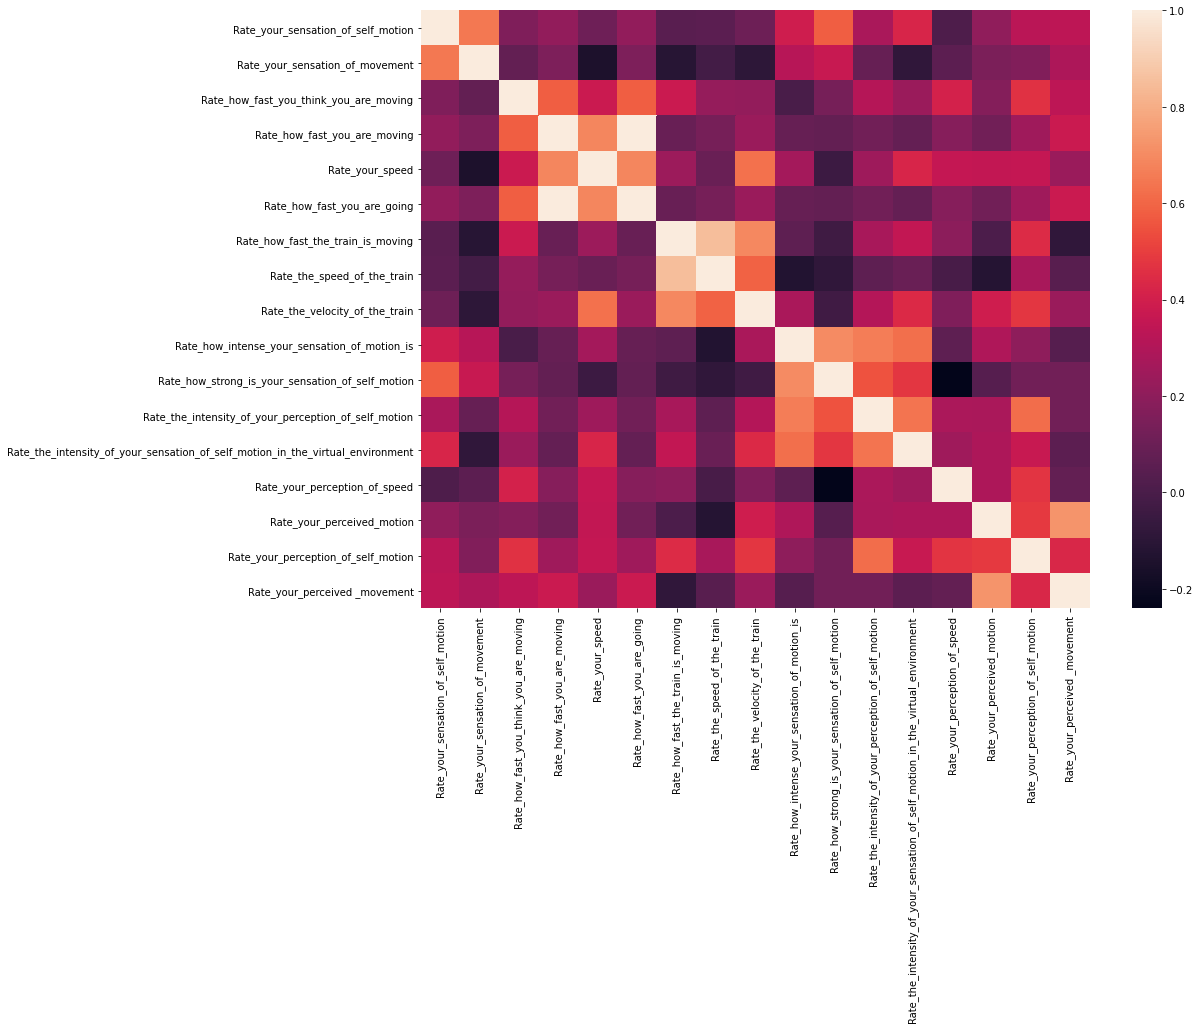

In [ ]:
#surveyData.Group_4.dropna(inplace=True)
#surveyData.Group_5.dropna(inplace=True)

corr = test.corr()
hmap=sns.heatmap(corr)
hmap.figure.savefig("Correlation_Heatmap_with_Seaborn.png",
                    format='png',
                    dpi=100)




In [ ]:
#for i in words_of_group1 and words_of_group2:
#ax = sns.heatmap(surveyData, center=surveyData.loc[sparse_matrix]])


# **DATA VISUALIZATION**

***QUESTIONS ASKED TO THE USER TO UNDERSTAND THEIR PERSPECTIVE FOR CLASSIFICATION***

*The Y -axis of the bar graph represents the group numbers of the user's classification for each of the questions*. For each of the questions we calculate what percent of the users have used which group and on what basis have they selected it.

**Q : Rate your sensation of self motion**

**Q : Rate_your_sensation_of_movement**



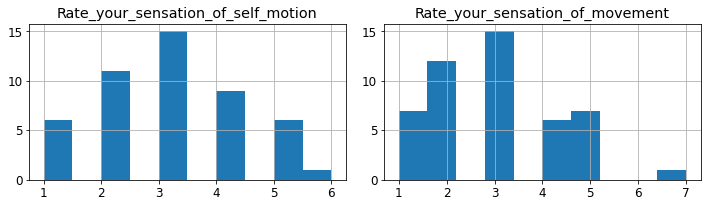

In [57]:
columns_to_plot = ['Rate_your_sensation_of_self_motion', 'Rate_your_sensation_of_movement']
fig = plt.figure(figsize=(10,8))
for i, column in enumerate(columns_to_plot):
    ax = fig.add_subplot(3,2,i+1)
    surveyData[column].hist(bins=10,ax=ax)
    ax.set_title(column)
fig.tight_layout()
plt.show()



As per the analysis it it noticed that for the question related to **" Rating the sensation of self motion "** 
- **31%** of the users selected **Group 3** 
- **22 %** of the users selected **Group 2**
- **19 %** of the users selected **Group 4** 

For the question related **' Rate_your_sensation_of_movement '**
- **31%** of the users selected **Group 3**
- **25%** of the users selected **Group 2**
- **14%** of the users selected **Group 5**



---


**For the next four questions** , majority of the users have classified under **Group 1 and Group 2.**


---



**Q : Rate_how_fast_you_think_you_are_moving**

**Q : Rate_how_fast_you_are_moving**

**Q : Rate_your_speed , Rate_how_fast_you_are_going**    

**Q : Rate_how_fast_the_train_is_moving**

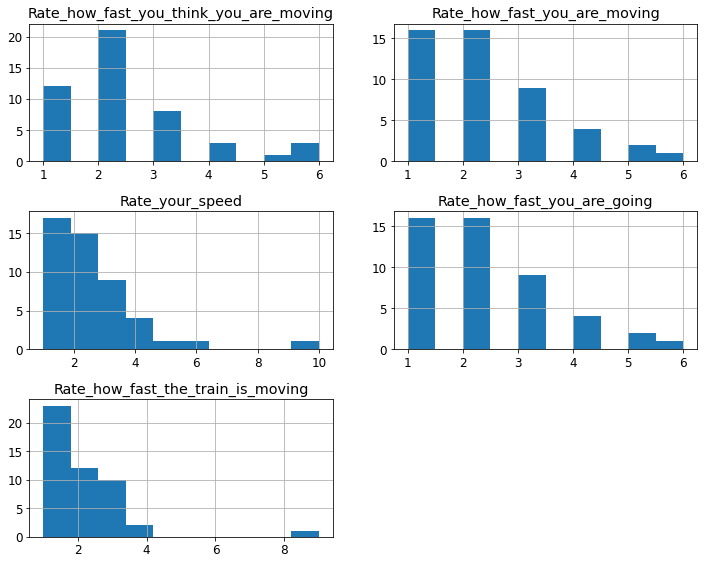

In [58]:
columns_to_plot = ['Rate_how_fast_you_think_you_are_moving', 'Rate_how_fast_you_are_moving', 
                   'Rate_your_speed', 'Rate_how_fast_you_are_going', 'Rate_how_fast_the_train_is_moving']
fig = plt.figure(figsize=(10,8))
for i, column in enumerate(columns_to_plot):
  ax = fig.add_subplot(3,2,i+1)
  surveyData[column].hist(bins=10,ax=ax)
  ax.set_title(column)
fig.tight_layout()
plt.show()                   

For the question **Rate_how_fast_you_think_you_are_moving**: 
- **44%** of the users classified under **Group 2**
- **25%** of the users classified under **Group 1**
- **17%** of the users classified under **Group 3**

For the question **Rate_how_fast_you_are_moving**:
- **33%** of the users choose **Group 2** and **Group 1**
- **19%** of the users choose **Group 3** 

For the question **Rate_your_speed** : 
- **35%** of the users selected **Group 1**
- **31%** of the users  selected **Group 2**

For the question **Rate_how_fast_you_are_going** : 
- **33%** of the users choose **Group 2** and **Group 1** 

For the question **Rate_how_fast_the_train_is_moving** : 
- **48%** of the users selected **Group 1**
- **25%** of the users selected **Group 2**



---


**For the next three questions** , the users have selected **Group 1 and (Group 4 , Group 3, Group2 )** equally for the last Question.


---



**Q : Rate_the_speed_of_the_train**

**Q : Rate_the_velocity_of_the_train**

**Q : Rate_how_intense_your_sensation_of_motion_is**

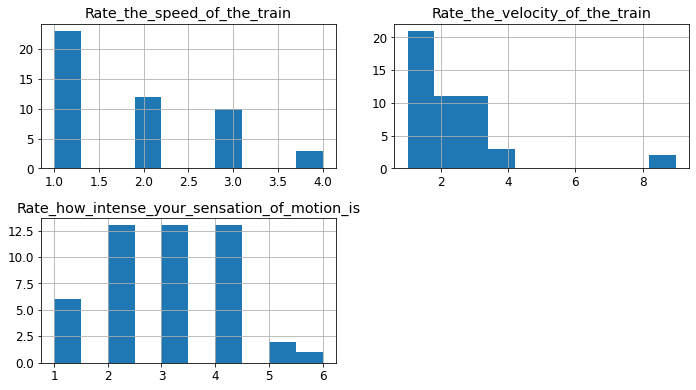

In [59]:
columns_to_plot = ['Rate_the_speed_of_the_train', 'Rate_the_velocity_of_the_train', 'Rate_how_intense_your_sensation_of_motion_is']
fig = plt.figure(figsize=(10,8))
for i, column in enumerate(columns_to_plot):
#    ax = fig.add_subplot(3,3,i+1)
    ax = fig.add_subplot(3,2,i+1)

    surveyData[column].hist(bins=10,ax=ax)
    ax.set_title(column)
fig.tight_layout()
plt.show()              

For the Question **Rate_the_speed_of_the_train** : 
- **47%** of the users selected **Group 1**
- **25%** of the users selected **Group 2**

For the question **Rate_the_velocity_of_the_train** : 
- **44%** of the users selected **Group 1**
- **22% **of the users selected **Group 3** and **Group 2**

For the question **Rate_how_intense_your_sensation_of_motion_is** :
- **27%** of the users have selected **Group 4** , **Group 3**  and **Group 2**



---


**For the next three questions** , the users have selected **Group 3 and Group 2** the most.


---



**Q : Rate_how_strong_is_your_sensation_of_self_motion**

**Q : Rate_the_intensity_of_your_perception_of_self_motion**

**Q :     Rate_the_intensity_of_your_sensation_of_self_motion_in_the_virtual_environment**

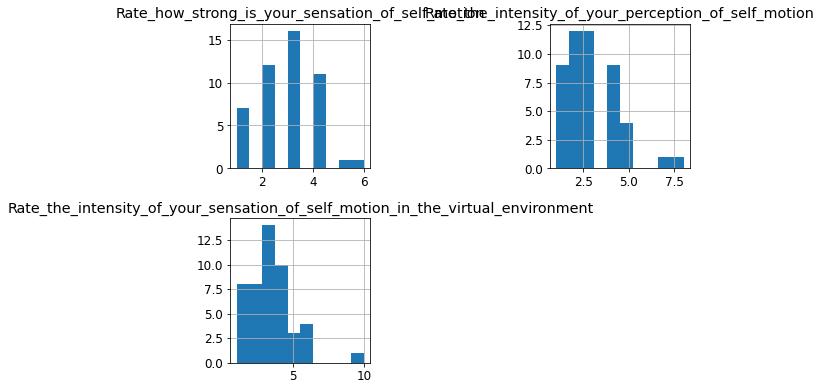

In [60]:
columns_to_plot = ['Rate_how_strong_is_your_sensation_of_self_motion', 'Rate_the_intensity_of_your_perception_of_self_motion', 'Rate_the_intensity_of_your_sensation_of_self_motion_in_the_virtual_environment']
fig = plt.figure(figsize=(10,8))
for i, column in enumerate(columns_to_plot):
#    ax = fig.add_subplot(3,3,i+1)
    ax = fig.add_subplot(3,2,i+1)

    surveyData[column].hist(bins=10,ax=ax)
    ax.set_title(column)
fig.tight_layout()
plt.show() 

For the question **Rate_how_strong_is_your_sensation_of_self_motion** : 
- **33%** of the users selected **Group 3**
- **25%** of the users selected **Group 2**

For the question **Rate_the_intensity_of_your_perception_of_self_motion** : 
- **25%** of the users selected **Group 3** and **Group 2**

For the question
      **Rate_the_intensity_of_your_sensation_of_self_motion_in_the_virtual_environment**: 
- **29%** of the users selected **Group 3**
- **20%** of the users selected **Group 4**



---


**For the last four questions** , the user has selected **Group 3 and Group 2** the most.


---



**Q : Rate_your_perception_of_speed**

**Q : Rate_your_perceived_motion**

**Q : Rate_your_perception_of_self_motion**

**Q : Rate_your_perceived _movement**

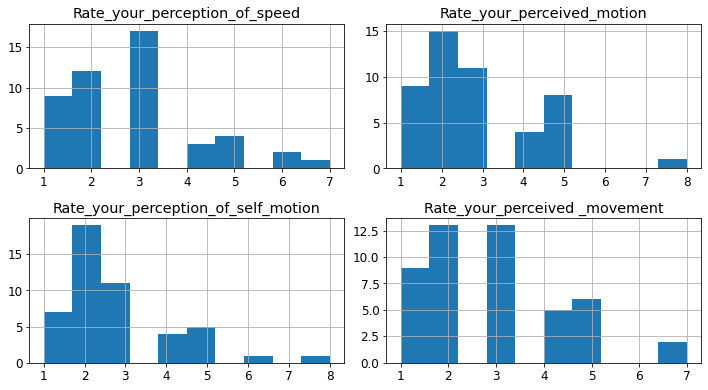

In [61]:
columns_to_plot = ['Rate_your_perception_of_speed', 'Rate_your_perceived_motion', 
                   'Rate_your_perception_of_self_motion', 'Rate_your_perceived _movement']
fig = plt.figure(figsize=(10,8))
for i, column in enumerate(columns_to_plot):
#    ax = fig.add_subplot(3,3,i+1)
    ax = fig.add_subplot(3,2,i+1)

    surveyData[column].hist(bins=10,ax=ax)
    ax.set_title(column)
fig.tight_layout()
plt.show() 

For the Question **Rate_your_perception_of_speed**: 
- **35%** of the users selected **Group 3**
- **25%** of the users selected **Group 2**

For the question **Rate_your_perceived_motion**:
- **31%** of the users selected **Group 2**
- **22%** of the users selected **Group 3**

For the question **Rate_your_perception_of_self_motion** :
- **40%** of the users selected **Group 2**
- **22%** of the users selected **Group 3**

For the question **Rate_your_perceived _movement**: 
- **27%** of the users have selected **Group 3** and **Group 2**

**Word cloud data visulization**

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points is being highlighted using a word cloud.

**WORD CLOUD OF USER'S JUSTIFICATION FOR SELECTING GROUP_1**

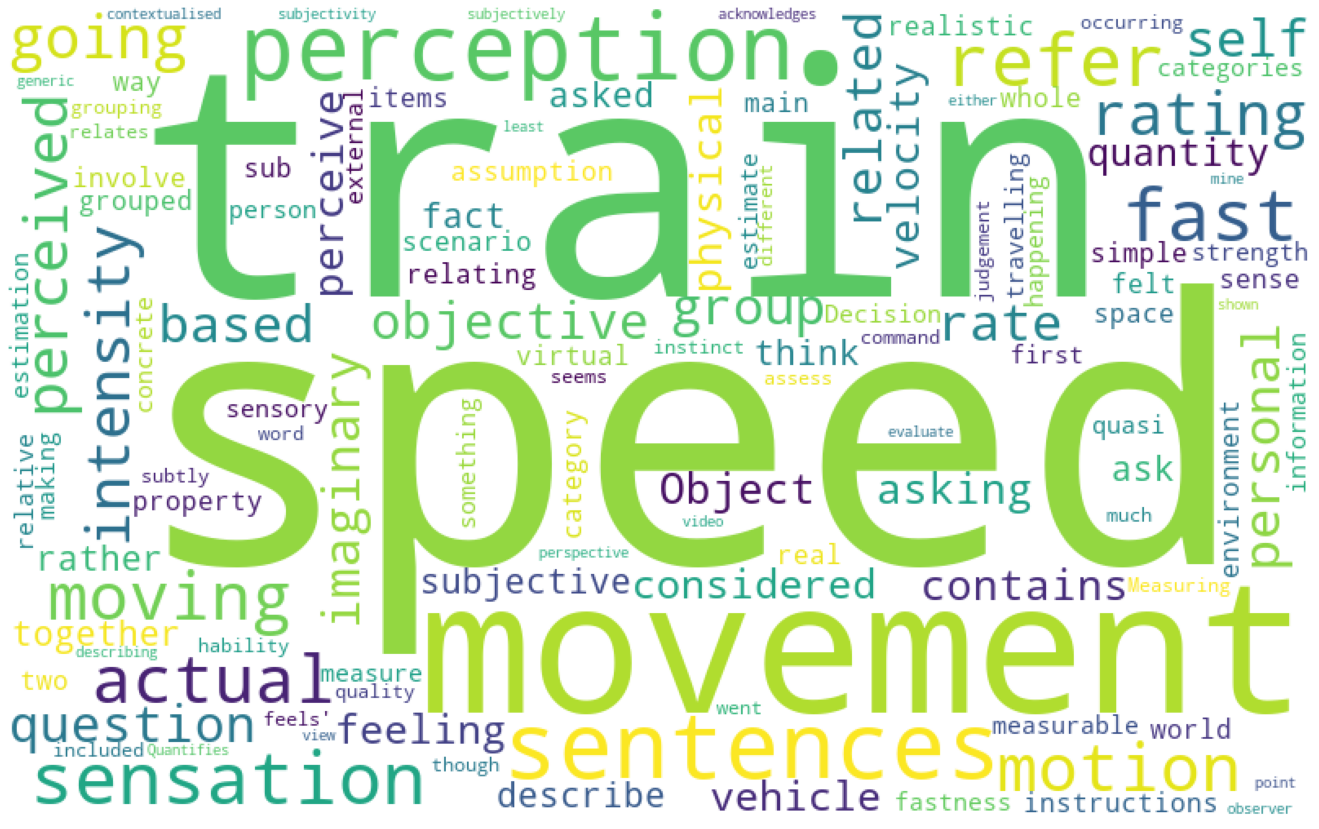

In [62]:
from wordcloud import WordCloud
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color='white',width=800,height=500).generate(" ".join(surveyData.Group_1))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

From the above wordcloud plot the most frequently used words by the user is highlighted bigger as shown in the above figure , which are : **Train** , **Speed** ,**movement**.

In [63]:
wordfreq = wordcloud.words_
wordfreq

{'Decision': 0.047619047619047616,
 'Measuring': 0.047619047619047616,
 'Object': 0.09523809523809523,
 'Quantifies': 0.047619047619047616,
 'acknowledges': 0.047619047619047616,
 'actual': 0.23809523809523808,
 'ask': 0.09523809523809523,
 'asked': 0.09523809523809523,
 'asking': 0.09523809523809523,
 'assess': 0.047619047619047616,
 'assumption': 0.047619047619047616,
 'based': 0.14285714285714285,
 'categories': 0.047619047619047616,
 'category': 0.047619047619047616,
 'command': 0.047619047619047616,
 'concrete': 0.047619047619047616,
 'considered': 0.09523809523809523,
 'contains': 0.09523809523809523,
 'contextualised': 0.047619047619047616,
 'describe': 0.09523809523809523,
 'describing': 0.047619047619047616,
 'different': 0.047619047619047616,
 'either': 0.047619047619047616,
 'environment': 0.047619047619047616,
 'estimate': 0.047619047619047616,
 'estimation': 0.047619047619047616,
 'evaluate': 0.047619047619047616,
 'external': 0.047619047619047616,
 'fact': 0.0952380952380

The frequency count of the words are in the range of 0 -1. Higher the value , higher is the frequency of occurance of words :

- Train = **0.7619047619047619**
- Speed = **1.0**
- Movement = **0.47619047619047616**

**WORD CLOUD OF USER'S JUSTIFICATION FOR SELECTING GROUP_2**

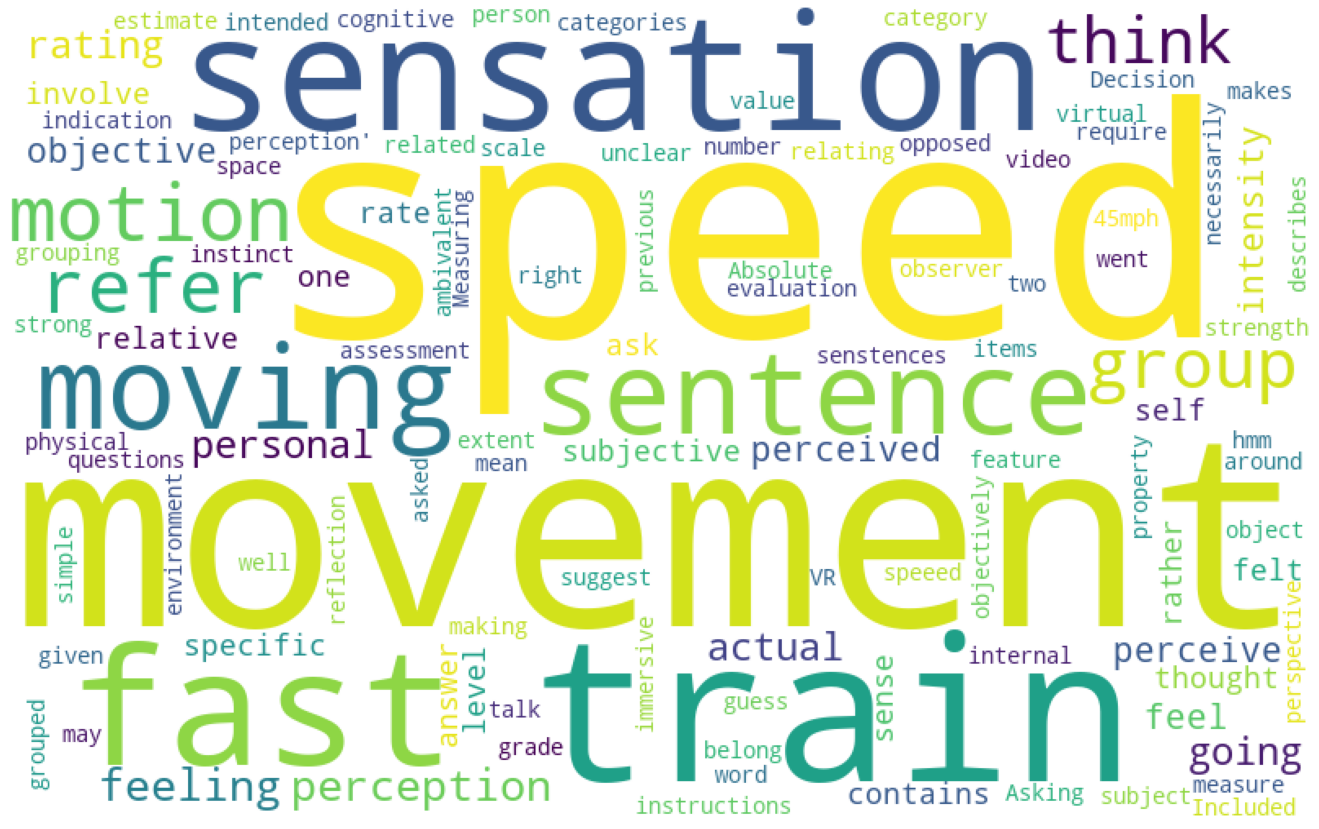

In [64]:
from wordcloud import WordCloud
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color='white',width=800,height=500).generate(" ".join(surveyData.Group_2))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

From the above wordcloud plot the most frequently used words by the user is highlighted bigger as shown above , which are : **Speed** , **Train** ,**movement** , **sensation**.

In [65]:
wordfreq = wordcloud.words_
wordfreq

{'45mph': 0.06666666666666667,
 'Absolute': 0.06666666666666667,
 'Asking': 0.06666666666666667,
 'Decision': 0.06666666666666667,
 'Included': 0.06666666666666667,
 'Measuring': 0.06666666666666667,
 'VR': 0.06666666666666667,
 'actual': 0.26666666666666666,
 'ambivalent': 0.06666666666666667,
 'answer': 0.13333333333333333,
 'around': 0.06666666666666667,
 'ask': 0.13333333333333333,
 'asked': 0.06666666666666667,
 'assessment': 0.06666666666666667,
 'belong': 0.06666666666666667,
 'categories': 0.06666666666666667,
 'category': 0.06666666666666667,
 'cognitive': 0.06666666666666667,
 'contains': 0.13333333333333333,
 'describes': 0.06666666666666667,
 'environment': 0.06666666666666667,
 'estimate': 0.06666666666666667,
 'evaluation': 0.06666666666666667,
 'extent': 0.06666666666666667,
 'fast': 0.5333333333333333,
 'feature': 0.06666666666666667,
 'feel': 0.2,
 'feeling': 0.3333333333333333,
 'felt': 0.13333333333333333,
 'given': 0.06666666666666667,
 'going': 0.26666666666666666,

The frequency count of the words are :

- Speed = **1.0**
- Movement = **0.9333333333333333**
- Train = **0.6**
- Sensation = **0.5333333333333333**

Plotting Pie chart for values greater than 0.60

In [66]:
len(wordfreq)

112

In [67]:

frequent_values = [*wordfreq.values()]


In [68]:
a= {}
for val in range(len(frequent_values)):
  if frequent_values[val] >= 0.60:
    a[val]= frequent_values[val]
    print(a)
    

{0: 1.0}
{0: 1.0, 1: 0.9333333333333333}
{0: 1.0, 1: 0.9333333333333333, 2: 0.6}


In [69]:
a

{0: 1.0, 1: 0.9333333333333333, 2: 0.6}

In [70]:
values_2 = [*a.values()]
values_2

[1.0, 0.9333333333333333, 0.6]

In [71]:
# import the pyplot library

import matplotlib.pyplot as plotter
#print(a)

figureObject, axesObject = plotter.subplots()

# Draw the pie chart

axesObject.pie(values_2,

        #labels=,

        autopct='%9.5f',

        startangle=90)

# Aspect ratio - equal means pie is a circle
axesObject.axis('equal')

plotter.show()

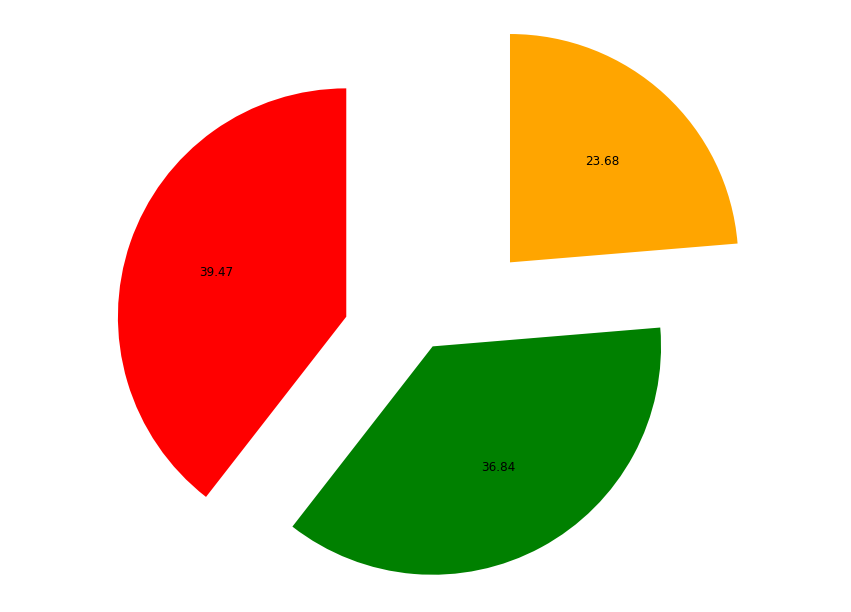

In [72]:
# import the pyplot library

import matplotlib.pyplot as plotter

group__2     = values_2
 

figureObject, axesObject = plotter.subplots()

 

explode = (0.4, 0.0, 0.5)

colors  = ("red", "green", "orange") #"cyan", "brown", "grey", "blue", "indigo", "beige", "yellow")

 

# Draw the pie chart

axesObject.pie(group__2,

               explode      = explode,

               colors       = colors,

               #labels       = ,

               autopct      = '%1.2f',

               startangle   = 90)

 

# Aspect ratio

axesObject.axis('equal')

 

plotter.show()

**WORD CLOUD OF USER'S JUSTIFICATION IN SELECTING FOR GROUP_3**

From the above wordcloud plot the most frequently used words by the user is highlighted bigger as shown above , which are : **Train** , **Speed** ,**Perception** , **movement**.

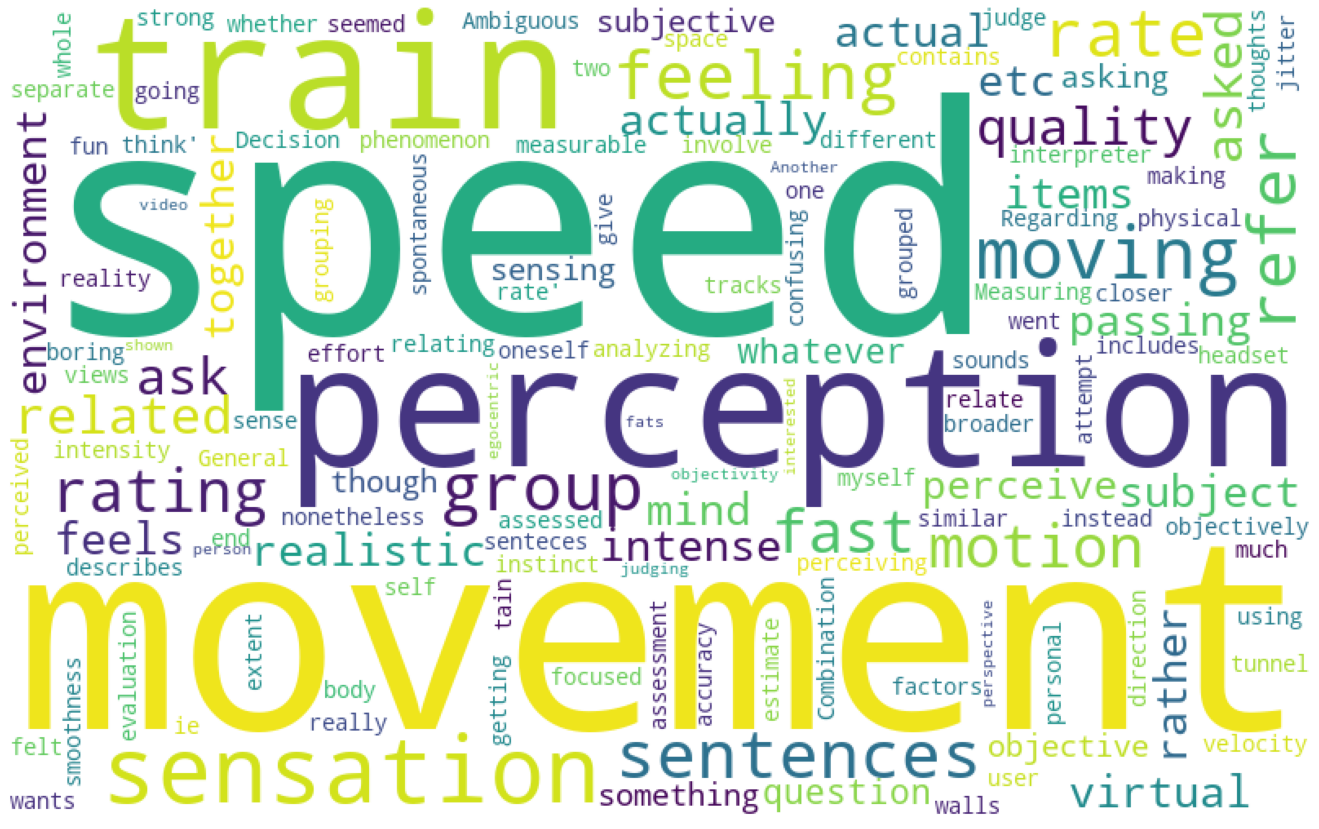

In [73]:
from wordcloud import WordCloud
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color='white',width=800,height=500).generate(" ".join(surveyData.Group_3))
wordfreq = wordcloud.words_
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [74]:
#WordCloud().process_text('speed movement sensation perception train moving')
wordfreq = wordcloud.words_
wordfreq

{'Ambiguous': 0.06666666666666667,
 'Another': 0.06666666666666667,
 'Combination': 0.06666666666666667,
 'Decision': 0.06666666666666667,
 'General': 0.06666666666666667,
 'Measuring': 0.06666666666666667,
 'Regarding': 0.06666666666666667,
 'accuracy': 0.06666666666666667,
 'actual': 0.13333333333333333,
 'actually': 0.13333333333333333,
 'analyzing': 0.06666666666666667,
 'ask': 0.2,
 'asked': 0.2,
 'asking': 0.13333333333333333,
 'assessed': 0.06666666666666667,
 'assessment': 0.06666666666666667,
 'attempt': 0.06666666666666667,
 'body': 0.06666666666666667,
 'boring': 0.06666666666666667,
 'broader': 0.06666666666666667,
 'closer': 0.06666666666666667,
 'confusing': 0.06666666666666667,
 'contains': 0.06666666666666667,
 'describes': 0.06666666666666667,
 'different': 0.06666666666666667,
 'direction': 0.06666666666666667,
 'effort': 0.06666666666666667,
 'egocentric': 0.06666666666666667,
 'end': 0.06666666666666667,
 'environment': 0.13333333333333333,
 'estimate': 0.0666666666

The frequency of it is obtained from below , where :

- Speed = **1.0**
- Movement = **0.9333333333333333**
- Perception = **0.8666666666666667**
- Train=**0.8**

**Group 4**

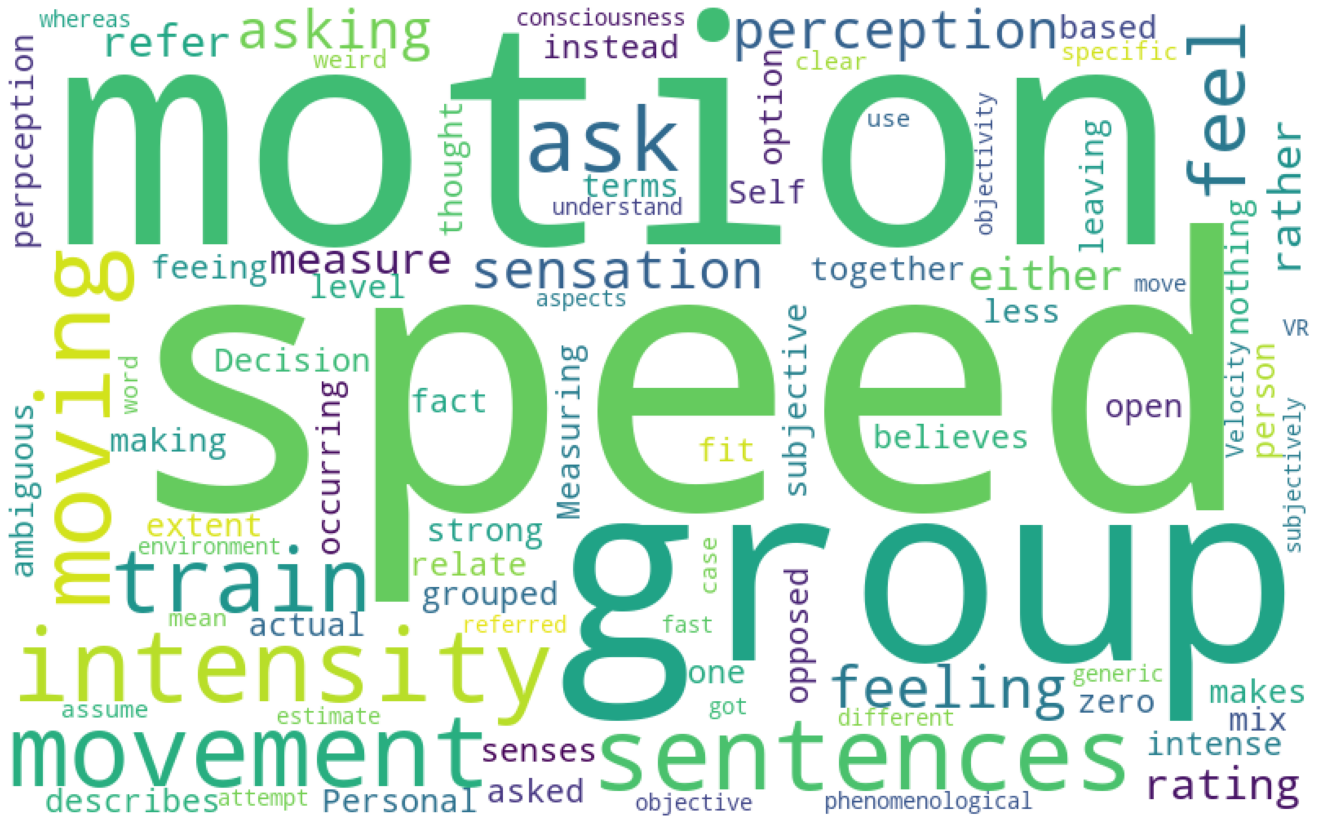

In [75]:
from wordcloud import WordCloud
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color='white',width=800,height=500).generate(" ".join(surveyData.Group_4))
wordfreq = wordcloud.words_
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [76]:
wordfreq = wordcloud.words_
wordfreq

{'Decision': 0.1111111111111111,
 'Measuring': 0.1111111111111111,
 'Personal': 0.1111111111111111,
 'Self': 0.1111111111111111,
 'VR': 0.1111111111111111,
 'Velocity': 0.1111111111111111,
 'actual': 0.1111111111111111,
 'ambiguous': 0.1111111111111111,
 'ask': 0.4444444444444444,
 'asked': 0.1111111111111111,
 'asking': 0.3333333333333333,
 'aspects': 0.1111111111111111,
 'assume': 0.1111111111111111,
 'attempt': 0.1111111111111111,
 'based': 0.1111111111111111,
 'believes': 0.1111111111111111,
 'case': 0.1111111111111111,
 'clear': 0.1111111111111111,
 'consciousness': 0.1111111111111111,
 'describes': 0.1111111111111111,
 'different': 0.1111111111111111,
 'either': 0.2222222222222222,
 'environment': 0.1111111111111111,
 'estimate': 0.1111111111111111,
 'extent': 0.1111111111111111,
 'fact': 0.1111111111111111,
 'fast': 0.1111111111111111,
 'feeing': 0.1111111111111111,
 'feel': 0.3333333333333333,
 'feeling': 0.3333333333333333,
 'fit': 0.1111111111111111,
 'generic': 0.11111111111

**Group 5**

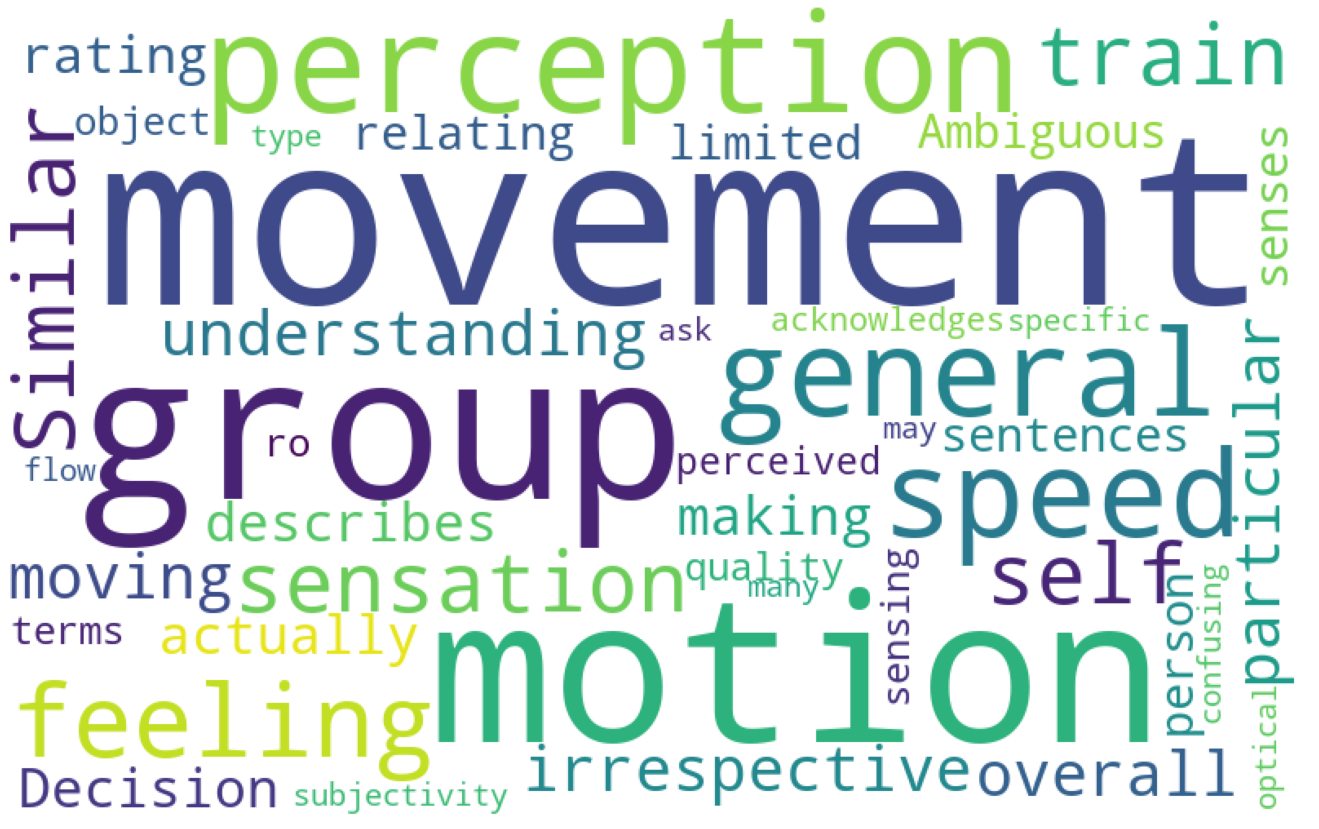

In [77]:
from wordcloud import WordCloud
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color='white',width=800,height=500).generate(" ".join(surveyData.Group_5))
wordfreq = wordcloud.words_
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [78]:
wordfreq = wordcloud.words_
wordfreq

{'Ambiguous': 0.16666666666666666,
 'Decision': 0.16666666666666666,
 'Similar': 0.3333333333333333,
 'acknowledges': 0.16666666666666666,
 'actually': 0.16666666666666666,
 'ask': 0.16666666666666666,
 'confusing': 0.16666666666666666,
 'describes': 0.16666666666666666,
 'feeling': 0.3333333333333333,
 'flow': 0.16666666666666666,
 'general': 0.5,
 'group': 0.6666666666666666,
 'irrespective': 0.16666666666666666,
 'limited': 0.16666666666666666,
 'making': 0.16666666666666666,
 'many': 0.16666666666666666,
 'may': 0.16666666666666666,
 'motion': 0.6666666666666666,
 'movement': 1.0,
 'moving': 0.16666666666666666,
 'object': 0.16666666666666666,
 'optical': 0.16666666666666666,
 'overall': 0.16666666666666666,
 'particular': 0.16666666666666666,
 'perceived': 0.16666666666666666,
 'perception': 0.6666666666666666,
 'person': 0.16666666666666666,
 'quality': 0.16666666666666666,
 'rating': 0.16666666666666666,
 'relating': 0.16666666666666666,
 'ro': 0.16666666666666666,
 'self': 0.33

 **Word Cloud of User's Justification for all the seven groups**

In [81]:
#from wordcloud import WordCloud
#plt.subplots(figsize=(50,50))
#plt.subplots(figsize=(25,15))

#wordcloud = WordCloud(background_color='white',width=1000,height=500).generate(" ".join(mergeddf))
#wordcloud = WordCloud(background_color='white',width=800,height=500).generate(" ".join(mergeddf))

#plt.imshow(wordcloud)
#plt.axis('off')
#plt.show()

In [80]:
#wordfreq = wordcloud.words_
#wordfreq

# **Rough Work**

**Bag  of words tells about the frequency of the occurance of the words**

In [ ]:
sentence = "words don't come easy"
d = ["come", "together", "easy", "does", "it"]

s1 = set(sentence.split())
s2 = set(d)

print (s1.intersection(s2))

{'easy', 'come'}


The most common words used by the user for all the seven groups are :
- Speed :1.0
-Perception : 0.8667
-Sensation : 0.666666
- Movement : 0.933333

**Clustering**

In [ ]:
>>> from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
>>> vectorizer = CountVectorizer(min_df=0, lowercase=False)
>>> vectorizer.fit(mergeddf)
>>> vectorizer.vocabulary_
X = vectorizer.fit_transform(mergeddf)

true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

In [ ]:
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

In [ ]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [ ]:

for i in range(true_k):
 print('Cluster %d:' % i),

 for ind in order_centroids[i, :10]:
   print ( '%s'  % terms [ind] )
  

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
import collections
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Read input file, note the encoding is specified here 
# It may be different in your text file
#file = open('PrideandPrejudice.txt', encoding="utf8")
a= TG3
# Stopwords
stopwords = set(stopwords.words('english'))
stopwords = stopwords.union(set(['mr','mrs','one','two','said']))
# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount = {}
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in a:
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1
# Print most common word
n_print = int(input("How many most common words to print: "))
print("\nOK. The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)
# Close the file
#file.close()
# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

**clustering**`

In [ ]:
>>> from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
#>>> vectorizer = CountVectorizer(min_df=0, lowercase=False)
#>>> vectorizer.fit(listings.Group_1 )
#>>> vectorizer.vocabulary_
X = vectorizer.fit_transform(listings.Group_1)

true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

In [ ]:
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

In [ ]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [ ]:
for i in range(true_k):
 print('Cluster %d:' % i),
 for ind in order_centroids[i, :10]:
   print ( '%s'  % terms [ind] )

https://towardsdatascience.com/applying-machine-learning-to-classify-an-unsupervised-text-document-e7bb6265f52

In [ ]:
>>> from sklearn.feature_extraction.text import CountVectorizer

>>> vectorizer = CountVectorizer(min_df=0, lowercase=False)
>>> vectorizer.fit(listings.Group_2 )
>>> vectorizer.vocabulary_

In [ ]:
>>> from sklearn.feature_extraction.text import CountVectorizer

>>> vectorizer = CountVectorizer(min_df=0, lowercase=False)
>>> vectorizer.fit(listings.Group_3 )
>>> vectorizer.vocabulary_